In [1]:
%matplotlib inline
import os
import sys
N_up = 2
nb_dir = '/'.join(os.getcwd().split('/')[:-N_up])
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
from __future__ import division
import numpy as np
import torch
import matplotlib.pyplot as plt

## do every dataset

In [8]:
from src.UCI_loader import load_UCI
# from src.gauss_cat import 
from src.compas_loader import get_my_COMPAS, X_dims_to_input_dim_vec, join_compas_targets
from src.LSAT_loader import get_my_LSAT, join_LSAT_targets

x_train, x_test, x_means, x_stds = \
    load_UCI(dset_name='wine', splits=10, seed=42, separate_targets=False, save_dir='../data/')
print('Wine', x_train.shape, x_test.shape)

x_train, x_test, x_means, x_stds  = \
    load_UCI(dset_name='default_credit', splits=10, seed=42, separate_targets=False, save_dir='../data/')
print('Credit', x_train.shape, x_test.shape)
print([1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,1 ,1, 2])

x_train, x_test, x_means, x_stds, y_train, y_test, feature_names, X_dims = \
    get_my_COMPAS(rseed=42, separate_test=True, test_ratio=0.1, save_dir='../data/')
input_dim_vec = X_dims_to_input_dim_vec(X_dims)
print('Compas', x_train.shape, x_test.shape)
print(input_dim_vec)
x_train, x_test, input_dim_vec = join_compas_targets(x_train, x_test, y_train, y_test, X_dims)
print('Compas', x_train.shape, x_test.shape)
print(input_dim_vec)

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds, my_data_keys, input_dim_vec = \
    get_my_LSAT(save_dir='../data/')
print('LSAT', x_train.shape, x_test.shape)
print(input_dim_vec)
x_train, x_test, input_dim_vec = join_LSAT_targets(x_train, x_test, y_train, y_test, input_dim_vec)
print('LSAT', x_train.shape, x_test.shape)
print(input_dim_vec)

('Wine', (1438, 12), (160, 12))
('Credit', (27000, 24), (3000, 24))
[1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]






('Compas', (5554, 17), (618, 17))
[3 6 2 2 2 1 1]
('Compas', (5554, 19), (618, 19))
[3 6 2 2 2 1 1 2]


('LSAT', (17432, 12), (4358, 12))
[1, 1, 8, 2]
('LSAT', (17432, 13), (4358, 13))
[1 1 8 2 1]


In [9]:
names = ['wine', 'default_credit', 'compas', 'lsat']
widths = [350, 350, 350, 350] # Bigger than VAE because the task of modelling all conditionals is more complex
depths = [3, 3, 3, 3] # We go deeper because we are using residual models
latent_dims = [6, 8, 4, 4]
under_latent_dims = [6, 8, 4, 4] # following the original paper we set dim(u) = dim(z) with d>r [r is true manifold dim]
under_latent_dims2 = [4, 6, 3, 3] # following the original paper we set dim(u) = dim(z) with d>r [r is true manifold dim]

# Train all datasets with targets and 2-level VAE


## wine 

wine

Net:
VAE_gauss_net
    Total params: 0.78M

Network:

Train:
  init cost variables:
it 0/2500, vlb -200.104178,    time: 0.387440 seconds

    vlb -24.824471 (-inf)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat



/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type VAEAC_gauss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MLP_preact_recognition_net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type

it 1/2500, vlb -127.066409,    time: 0.258988 seconds

    vlb -64.557005 (-24.824471)

it 2/2500, vlb -125.207812,    time: 0.226983 seconds

    vlb -81.706068 (-24.824471)

it 3/2500, vlb -108.609130,    time: 0.229837 seconds

    vlb -67.285220 (-24.824471)

it 4/2500, vlb -79.781046,    time: 0.223469 seconds

    vlb -43.984881 (-24.824471)

it 5/2500, vlb -74.333388,    time: 0.230472 seconds

    vlb -51.720379 (-24.824471)

it 6/2500, vlb -56.863105,    time: 0.231493 seconds

    vlb -42.799973 (-24.824471)

it 7/2500, vlb -55.861598,    time: 0.219713 seconds

    vlb -45.823367 (-24.824471)

it 8/2500, vlb -51.748590,    time: 0.225555 seconds

    vlb -46.313734 (-24.824471)

it 9/2500, vlb -52.718691,    time: 0.233071 seconds

    vlb -56.328745 (-24.824471)

it 10/2500, vlb -44.678233,    time: 0.227619 seconds

    vlb -39.522797 (-24.824471)

it 11/2500, vlb -44.737197,    time: 0.228422 seconds

    vlb -42.983331 (-24.824471)

it 12/2500, vlb -44.896049,    time: 0

    vlb -15.381319 (-15.486000)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 64/2500, vlb -18.255852,    time: 0.251494 seconds

    vlb -15.031029 (-15.381319)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 65/2500, vlb -18.014235,    time: 0.245015 seconds

    vlb -14.965973 (-15.031029)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 66/2500, vlb -17.808483,    time: 0.251609 seconds

    vlb -14.685888 (-14.965973)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 67/2500, vlb -18.138584,    time: 0.234446 seconds

    vlb -14.785685 (-14.685888)

it 68/2500, vlb -17.508094,    time: 0.222389 seconds

    vlb -14.235803 (-14.685888)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 69/2500, vlb -17.841263,    time: 0.230257 seconds

    vlb -14.549126 (-14.235803)

it 70/2500, vlb -17.924852,    time: 0.222063 seconds

    vlb -14.391658 (-14.235803)

it 71/2500, vlb -17.3

    vlb -11.733528 (-11.640861)

it 127/2500, vlb -14.323249,    time: 0.223981 seconds

    vlb -11.875681 (-11.640861)

it 128/2500, vlb -14.466202,    time: 0.223112 seconds

    vlb -11.805117 (-11.640861)

it 129/2500, vlb -14.375222,    time: 0.220968 seconds

    vlb -11.627999 (-11.640861)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 130/2500, vlb -14.310729,    time: 0.254313 seconds

    vlb -11.631421 (-11.627999)

it 131/2500, vlb -14.090696,    time: 0.230783 seconds

    vlb -11.632629 (-11.627999)

it 132/2500, vlb -14.249893,    time: 0.221885 seconds

    vlb -11.671802 (-11.627999)

it 133/2500, vlb -14.243552,    time: 0.222812 seconds

    vlb -11.422713 (-11.627999)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 134/2500, vlb -14.099553,    time: 0.254126 seconds

    vlb -11.264289 (-11.422713)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 135/2500, vlb -14.058604,    time: 0.255418 seconds

 

    vlb -10.429324 (-10.172438)

it 192/2500, vlb -12.779812,    time: 0.227452 seconds

    vlb -10.250084 (-10.172438)

it 193/2500, vlb -12.743357,    time: 0.230449 seconds

    vlb -10.144654 (-10.172438)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 194/2500, vlb -12.758480,    time: 0.254902 seconds

    vlb -10.086615 (-10.144654)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 195/2500, vlb -12.716880,    time: 0.259654 seconds

    vlb -10.356277 (-10.086615)

it 196/2500, vlb -12.467965,    time: 0.224836 seconds

    vlb -10.200918 (-10.086615)

it 197/2500, vlb -12.650003,    time: 0.228996 seconds

    vlb -10.189281 (-10.086615)

it 198/2500, vlb -12.714445,    time: 0.229863 seconds

    vlb -10.247028 (-10.086615)

it 199/2500, vlb -12.538382,    time: 0.221446 seconds

    vlb -10.316350 (-10.086615)

it 200/2500, vlb -12.489548,    time: 0.231748 seconds

    vlb -10.301569 (-10.086615)

it 201/2500, vlb -12.506714,    ti

    vlb -9.478899 (-9.110695)

it 259/2500, vlb -11.377838,    time: 0.222124 seconds

    vlb -9.259661 (-9.110695)

it 260/2500, vlb -11.297926,    time: 0.229452 seconds

    vlb -9.207134 (-9.110695)

it 261/2500, vlb -11.320537,    time: 0.224532 seconds

    vlb -8.766924 (-9.110695)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 262/2500, vlb -11.327875,    time: 0.259624 seconds

    vlb -9.052508 (-8.766924)

it 263/2500, vlb -11.275082,    time: 0.223940 seconds

    vlb -8.958053 (-8.766924)

it 264/2500, vlb -11.413777,    time: 0.226777 seconds

    vlb -8.990372 (-8.766924)

it 265/2500, vlb -11.293426,    time: 0.223677 seconds

    vlb -8.962510 (-8.766924)

it 266/2500, vlb -11.329980,    time: 0.221134 seconds

    vlb -8.956027 (-8.766924)

it 267/2500, vlb -11.181369,    time: 0.231134 seconds

    vlb -8.941068 (-8.766924)

it 268/2500, vlb -11.203736,    time: 0.228127 seconds

    vlb -8.940291 (-8.766924)

it 269/2500, vlb -11.188091,    t

    vlb -7.896013 (-7.630869)

it 330/2500, vlb -10.154540,    time: 0.224068 seconds

    vlb -7.953448 (-7.630869)

it 331/2500, vlb -10.167330,    time: 0.229821 seconds

    vlb -7.594309 (-7.630869)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 332/2500, vlb -10.018886,    time: 0.248879 seconds

    vlb -7.812106 (-7.594309)

it 333/2500, vlb -10.071507,    time: 0.230585 seconds

    vlb -7.699479 (-7.594309)

it 334/2500, vlb -10.169169,    time: 0.223871 seconds

    vlb -7.880427 (-7.594309)

it 335/2500, vlb -10.043621,    time: 0.230209 seconds

    vlb -7.906385 (-7.594309)

it 336/2500, vlb -10.068310,    time: 0.222954 seconds

    vlb -7.797002 (-7.594309)

it 337/2500, vlb -10.083041,    time: 0.220619 seconds

    vlb -7.751997 (-7.594309)

it 338/2500, vlb -9.916278,    time: 0.225104 seconds

    vlb -7.482937 (-7.594309)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 339/2500, vlb -9.954068,    time: 0.243374 seconds



it 402/2500, vlb -8.970200,    time: 0.222851 seconds

    vlb -7.166890 (-6.822996)

it 403/2500, vlb -9.071901,    time: 0.228518 seconds

    vlb -6.995398 (-6.822996)

it 404/2500, vlb -9.083069,    time: 0.223367 seconds

    vlb -6.868811 (-6.822996)

it 405/2500, vlb -8.976448,    time: 0.223815 seconds

    vlb -6.996097 (-6.822996)

it 406/2500, vlb -9.020583,    time: 0.230529 seconds

    vlb -6.792507 (-6.822996)

Writting ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

it 407/2500, vlb -9.246256,    time: 0.258161 seconds

    vlb -7.022883 (-6.792507)

it 408/2500, vlb -8.907146,    time: 0.227973 seconds

    vlb -7.170005 (-6.792507)

it 409/2500, vlb -9.343411,    time: 0.224698 seconds

    vlb -6.893081 (-6.792507)

it 410/2500, vlb -9.166770,    time: 0.222889 seconds

    vlb -6.794543 (-6.792507)

it 411/2500, vlb -9.093480,    time: 0.224772 seconds

    vlb -6.887869 (-6.792507)

it 412/2500, vlb -8.925728,    time: 0.223040 seconds

    vlb -6.753863 (

    vlb -6.737172 (-6.184721)

it 475/2500, vlb -8.047163,    time: 0.223057 seconds

    vlb -6.580810 (-6.184721)

it 476/2500, vlb -8.021547,    time: 0.222346 seconds

    vlb -6.333085 (-6.184721)

it 477/2500, vlb -8.298550,    time: 0.224100 seconds

    vlb -6.435309 (-6.184721)

it 478/2500, vlb -8.108867,    time: 0.224612 seconds

    vlb -6.544201 (-6.184721)

it 479/2500, vlb -8.089152,    time: 0.225673 seconds

    vlb -6.589291 (-6.184721)

it 480/2500, vlb -8.310137,    time: 0.228910 seconds

    vlb -6.721095 (-6.184721)

it 481/2500, vlb -8.317439,    time: 0.231286 seconds

    vlb -6.465127 (-6.184721)

it 482/2500, vlb -8.256990,    time: 0.226547 seconds

    vlb -6.453252 (-6.184721)

it 483/2500, vlb -8.179134,    time: 0.229371 seconds

    vlb -6.277442 (-6.184721)

it 484/2500, vlb -8.049696,    time: 0.227876 seconds

    vlb -6.467417 (-6.184721)

it 485/2500, vlb -8.177527,    time: 0.223294 seconds

    vlb -6.572825 (-6.184721)

it 486/2500, vlb -8.251

    vlb -6.030493 (-5.616197)

it 552/2500, vlb -7.597090,    time: 0.229199 seconds

    vlb -6.070175 (-5.616197)

it 553/2500, vlb -7.593219,    time: 0.221707 seconds

    vlb -5.993825 (-5.616197)

it 554/2500, vlb -7.297806,    time: 0.220595 seconds

    vlb -6.091007 (-5.616197)

it 555/2500, vlb -7.404760,    time: 0.222512 seconds

    vlb -6.164758 (-5.616197)

it 556/2500, vlb -7.543647,    time: 0.221780 seconds

    vlb -6.761901 (-5.616197)

it 557/2500, vlb -7.376446,    time: 0.228637 seconds

    vlb -5.947300 (-5.616197)

it 558/2500, vlb -7.572094,    time: 0.228308 seconds

    vlb -6.060097 (-5.616197)

it 559/2500, vlb -7.520931,    time: 0.217490 seconds

    vlb -6.117219 (-5.616197)

it 560/2500, vlb -7.584456,    time: 0.223253 seconds

    vlb -6.198206 (-5.616197)

it 561/2500, vlb -7.423875,    time: 0.223667 seconds

    vlb -6.384992 (-5.616197)

it 562/2500, vlb -7.225715,    time: 0.243001 seconds

    vlb -6.393625 (-5.616197)

it 563/2500, vlb -7.399

    vlb -6.224381 (-5.616197)

it 631/2500, vlb -6.937051,    time: 0.224173 seconds

    vlb -6.180714 (-5.616197)

it 632/2500, vlb -7.146813,    time: 0.223134 seconds

    vlb -6.142820 (-5.616197)

it 633/2500, vlb -6.821301,    time: 0.242061 seconds

    vlb -5.999962 (-5.616197)

it 634/2500, vlb -6.928775,    time: 0.223434 seconds

    vlb -6.150911 (-5.616197)

it 635/2500, vlb -6.843698,    time: 0.226983 seconds

    vlb -6.144171 (-5.616197)

it 636/2500, vlb -6.905288,    time: 0.222197 seconds

    vlb -6.019166 (-5.616197)

it 637/2500, vlb -6.933358,    time: 0.224645 seconds

    vlb -6.239843 (-5.616197)

it 638/2500, vlb -7.047937,    time: 0.220841 seconds

    vlb -6.276293 (-5.616197)

it 639/2500, vlb -6.709269,    time: 0.230231 seconds

    vlb -6.315841 (-5.616197)

it 640/2500, vlb -6.809336,    time: 0.223970 seconds

    vlb -6.165635 (-5.616197)

it 641/2500, vlb -6.981634,    time: 0.223260 seconds

    vlb -6.179517 (-5.616197)

it 642/2500, vlb -6.713

it 709/2500, vlb -6.715357,    time: 0.224363 seconds

    vlb -6.568755 (-5.575564)

it 710/2500, vlb -6.195557,    time: 0.225703 seconds

    vlb -6.402261 (-5.575564)

it 711/2500, vlb -6.228169,    time: 0.229811 seconds

    vlb -6.001074 (-5.575564)

it 712/2500, vlb -6.376936,    time: 0.229028 seconds

    vlb -6.407223 (-5.575564)

it 713/2500, vlb -6.790923,    time: 0.232897 seconds

    vlb -6.350474 (-5.575564)

it 714/2500, vlb -6.622275,    time: 0.225332 seconds

    vlb -6.192552 (-5.575564)

it 715/2500, vlb -6.175925,    time: 0.223538 seconds

    vlb -6.438572 (-5.575564)

it 716/2500, vlb -6.563131,    time: 0.221176 seconds

    vlb -6.629360 (-5.575564)

it 717/2500, vlb -6.104238,    time: 0.229394 seconds

    vlb -6.664594 (-5.575564)

it 718/2500, vlb -6.502006,    time: 0.222063 seconds

    vlb -6.520008 (-5.575564)

it 719/2500, vlb -6.403651,    time: 0.229342 seconds

    vlb -6.649368 (-5.575564)

it 720/2500, vlb -6.461174,    time: 0.223331 seconds


it 788/2500, vlb -6.167973,    time: 0.224117 seconds

    vlb -6.831682 (-5.575564)

it 789/2500, vlb -5.980246,    time: 0.225240 seconds

    vlb -6.405449 (-5.575564)

it 790/2500, vlb -6.096184,    time: 0.218675 seconds

    vlb -6.247509 (-5.575564)

it 791/2500, vlb -6.067363,    time: 0.223130 seconds

    vlb -6.087123 (-5.575564)

it 792/2500, vlb -5.796345,    time: 0.239479 seconds

    vlb -6.333833 (-5.575564)

it 793/2500, vlb -6.262097,    time: 0.226049 seconds

    vlb -6.402616 (-5.575564)

it 794/2500, vlb -6.471905,    time: 0.223222 seconds

    vlb -6.244847 (-5.575564)

it 795/2500, vlb -5.778849,    time: 0.218894 seconds

    vlb -6.980817 (-5.575564)

it 796/2500, vlb -5.963267,    time: 0.220626 seconds

    vlb -6.731071 (-5.575564)

it 797/2500, vlb -6.096889,    time: 0.223060 seconds

    vlb -5.886616 (-5.575564)

it 798/2500, vlb -5.708395,    time: 0.220583 seconds

    vlb -6.280601 (-5.575564)

it 799/2500, vlb -5.792248,    time: 0.230601 seconds


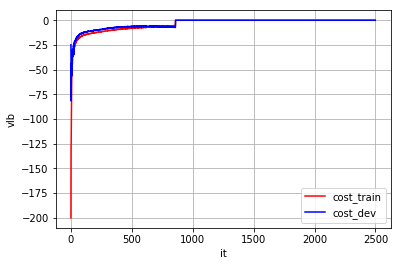

In [6]:
from src.UCI_loader import load_UCI
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss import VAEAC_gauss_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker

masker = top_masker(p=1)


dname = 'wine'
print(dname)

x_train, x_test, x_means, x_stds = \
load_UCI(dset_name=dname, splits=10, seed=42, separate_targets=False, save_dir='../data/')

trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_train, transform=None)

save_dir = '../saves/fc_preact_VAEAC_NEW_' + dname

input_dim = x_train.shape[1]
width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]

batch_size = 128
nb_epochs = 2500
lr = 1e-4
early_stop = 200

cuda = torch.cuda.is_available()

net = VAEAC_gauss_net(input_dim, width, depth, latent_dim, pred_sig=True, lr=lr, cuda=cuda)

vlb_train, vlb_dev = train_VAEAC(net, masker, save_dir, batch_size, nb_epochs, trainset, valset, cuda,
            flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)






## Under wine with class

In [15]:
%matplotlib inline
import torch
from torchvision import datasets, transforms
from src.UCI_loader import load_UCI
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss import VAEAC_gauss_net
from VAEAC.train import train_VAEAC
from VAEAC.under_net import under_VAEAC
from VAE.train import train_VAE
from src.utils import Datafeed
from src.masks import top_masker

dname = 'wine'
    
cuda = torch.cuda.is_available()
    
print(dname)
x_train, x_test, x_means, x_stds = \
x_train, x_test, x_means, x_stds = \
load_UCI(dset_name=dname, splits=10, seed=42, separate_targets=False, save_dir='../data/')
trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_train, transform=None)

#     save_dir = 'saves/fc_VAEAC_4d_' + dname

input_dim = x_train.shape[1]
width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]
lr = 1e-4
base_network_wraper  = VAEAC_gauss_net(input_dim, width, depth, latent_dim, pred_sig=True, lr=lr, cuda=cuda)
base_network_wraper.load('../saves/fc_preact_VAEAC_NEW_' + dname + '_models/theta_best.dat')


base_network = base_network_wraper.model
width = 150
depth = 2
latent_dim = under_latent_dims2[names.index(dname)]

batch_size = 128
nb_epochs = 2000
lr = 1e-4
early_stop=200

savedir = '../saves/fc_VAEAC_NEW_under2_' + dname

cuda = torch.cuda.is_available()

under_VAEA_net = under_VAEAC(base_network, width, depth, latent_dim, lr, cuda=cuda)

vlb_train, vlb_dev = train_VAE(under_VAEA_net, savedir,
                               batch_size, nb_epochs, trainset, valset, cuda=cuda,
                               flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)





wine

Net:
VAE_gauss_net
    Total params: 0.78M
Reading ../saves/fc_preact_VAEAC_NEW_wine_models/theta_best.dat

  restoring epoch: 658, lr: 0.000100

Net:
VAE_gauss_net
    Total params: 0.05M

Network:

Train:
  init cost variables:
it 0/2000, vlb -18.274190,    time: 0.468319 seconds

    vlb -15.380229 (-inf)

Writting ../saves/fc_VAEAC_NEW_under2_wine_models/theta_best.dat



/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type VAE_gauss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MLP_preact_recognition_net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type "

it 1/2000, vlb -16.370944,    time: 0.270416 seconds

    vlb -13.632772 (-15.380229)

Writting ../saves/fc_VAEAC_NEW_under2_wine_models/theta_best.dat

it 2/2000, vlb -14.614086,    time: 0.221697 seconds

    vlb -12.650748 (-13.632772)

Writting ../saves/fc_VAEAC_NEW_under2_wine_models/theta_best.dat

it 3/2000, vlb -13.632908,    time: 0.252505 seconds

    vlb -12.434321 (-12.650748)

Writting ../saves/fc_VAEAC_NEW_under2_wine_models/theta_best.dat

it 4/2000, vlb -12.947766,    time: 0.250877 seconds

    vlb -10.817623 (-12.434321)

Writting ../saves/fc_VAEAC_NEW_under2_wine_models/theta_best.dat

it 5/2000, vlb -12.455997,    time: 0.254466 seconds

    vlb -10.411310 (-10.817623)

Writting ../saves/fc_VAEAC_NEW_under2_wine_models/theta_best.dat

it 6/2000, vlb -11.756071,    time: 0.225396 seconds

    vlb -10.312194 (-10.411310)

Writting ../saves/fc_VAEAC_NEW_under2_wine_models/theta_best.dat

it 7/2000, vlb -11.284884,    time: 0.262753 seconds

    vlb -9.902563 (-10.31219

Writting ../saves/fc_VAEAC_NEW_under2_wine_models/theta_best.dat

it 69/2000, vlb -8.697686,    time: 0.262667 seconds

    vlb -7.820522 (-7.727767)

it 70/2000, vlb -8.777824,    time: 0.219990 seconds

    vlb -8.028075 (-7.727767)

it 71/2000, vlb -8.669092,    time: 0.242941 seconds

    vlb -8.362057 (-7.727767)

it 72/2000, vlb -8.646599,    time: 0.244409 seconds

    vlb -8.086200 (-7.727767)

it 73/2000, vlb -8.671827,    time: 0.270726 seconds

    vlb -7.722913 (-7.727767)

Writting ../saves/fc_VAEAC_NEW_under2_wine_models/theta_best.dat

it 74/2000, vlb -8.753819,    time: 0.259507 seconds

    vlb -8.224614 (-7.722913)

it 75/2000, vlb -8.642434,    time: 0.233041 seconds

    vlb -8.384725 (-7.722913)

it 76/2000, vlb -8.842480,    time: 0.258194 seconds

    vlb -7.726750 (-7.722913)

it 77/2000, vlb -8.724072,    time: 0.245220 seconds

    vlb -8.350586 (-7.722913)

it 78/2000, vlb -8.724895,    time: 0.257832 seconds

    vlb -8.060156 (-7.722913)

it 79/2000, vlb -8

    vlb -7.319835 (-7.216259)

it 145/2000, vlb -8.221292,    time: 0.275615 seconds

    vlb -7.706099 (-7.216259)

it 146/2000, vlb -8.399909,    time: 0.221074 seconds

    vlb -7.554540 (-7.216259)

it 147/2000, vlb -8.245295,    time: 0.286931 seconds

    vlb -8.100823 (-7.216259)

it 148/2000, vlb -8.232923,    time: 0.258361 seconds

    vlb -7.621977 (-7.216259)

it 149/2000, vlb -8.264220,    time: 0.229060 seconds

    vlb -7.695958 (-7.216259)

it 150/2000, vlb -8.305202,    time: 0.288716 seconds

    vlb -7.704279 (-7.216259)

it 151/2000, vlb -8.381956,    time: 0.255074 seconds

    vlb -7.427382 (-7.216259)

it 152/2000, vlb -8.244393,    time: 0.270852 seconds

    vlb -7.658192 (-7.216259)

it 153/2000, vlb -8.361932,    time: 0.273451 seconds

    vlb -7.565989 (-7.216259)

it 154/2000, vlb -8.278516,    time: 0.271973 seconds

    vlb -7.635600 (-7.216259)

it 155/2000, vlb -8.281284,    time: 0.268914 seconds

    vlb -7.852380 (-7.216259)

it 156/2000, vlb -8.322

    vlb -7.656030 (-7.216259)

it 224/2000, vlb -8.259059,    time: 0.260512 seconds

    vlb -7.662133 (-7.216259)

it 225/2000, vlb -8.209045,    time: 0.239708 seconds

    vlb -7.831698 (-7.216259)

it 226/2000, vlb -8.192405,    time: 0.263100 seconds

    vlb -7.567828 (-7.216259)

it 227/2000, vlb -8.179985,    time: 0.215983 seconds

    vlb -7.574519 (-7.216259)

it 228/2000, vlb -8.384874,    time: 0.241270 seconds

    vlb -7.713176 (-7.216259)

it 229/2000, vlb -8.188934,    time: 0.212256 seconds

    vlb -7.619394 (-7.216259)

it 230/2000, vlb -8.089717,    time: 0.242247 seconds

    vlb -7.826314 (-7.216259)

it 231/2000, vlb -8.254036,    time: 0.255332 seconds

    vlb -8.058264 (-7.216259)

it 232/2000, vlb -8.117031,    time: 0.276836 seconds

    vlb -8.087640 (-7.216259)

it 233/2000, vlb -8.276294,    time: 0.270002 seconds

    vlb -7.385640 (-7.216259)

it 234/2000, vlb -8.285687,    time: 0.235462 seconds

    vlb -7.808288 (-7.216259)

it 235/2000, vlb -8.194

    vlb -7.731390 (-7.216259)

it 303/2000, vlb -8.306364,    time: 0.277445 seconds

    vlb -7.859301 (-7.216259)

it 304/2000, vlb -8.238565,    time: 0.253285 seconds

    vlb -7.459315 (-7.216259)

it 305/2000, vlb -8.216632,    time: 0.234935 seconds

    vlb -7.440338 (-7.216259)

it 306/2000, vlb -8.076444,    time: 0.252718 seconds

    vlb -7.905595 (-7.216259)

it 307/2000, vlb -8.199190,    time: 0.256870 seconds

    vlb -7.588703 (-7.216259)

it 308/2000, vlb -8.124669,    time: 0.275767 seconds

    vlb -7.617638 (-7.216259)

it 309/2000, vlb -8.142997,    time: 0.266324 seconds

    vlb -7.639882 (-7.216259)

it 310/2000, vlb -8.236545,    time: 0.229738 seconds

    vlb -7.751548 (-7.216259)

it 311/2000, vlb -8.181857,    time: 0.274767 seconds

    vlb -7.452883 (-7.216259)

it 312/2000, vlb -8.150379,    time: 0.214860 seconds

    vlb -7.598523 (-7.216259)

it 313/2000, vlb -8.148405,    time: 0.246539 seconds

    vlb -7.674615 (-7.216259)

it 314/2000, vlb -8.214

/homes/ja666/Documents/mphil_project/mphil_src/VAE/train.py:170: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/homes/ja666/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/homes/ja666/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/homes/ja666/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/homes/ja666/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/homes/ja666/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499, in st

## Credit with class


[1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
(27000, 24)
(3000, 24)
default_credit

Net:
VAE_gauss_net
    Total params: 0.80M

Network:

Train:
  init cost variables:
it 0/2000, vlb -18.562474,    time: 9.991888 seconds

    vlb -8.903551 (-inf)

Writting ../saves/fc_preact_VAEAC_NEW2_default_credit_models/theta_best.dat



/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type VAEAC_gauss_cat. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MLP_preact_prior_net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type rms_cat_loglike. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/homes/ja666/anaconda2/lib/python2.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CrossEntropyLoss. It won't be checked for correctness upon loa

it 1/2000, vlb -11.447978,    time: 9.815523 seconds

    vlb -7.760995 (-8.903551)

Writting ../saves/fc_preact_VAEAC_NEW2_default_credit_models/theta_best.dat

it 2/2000, vlb -10.304472,    time: 10.179726 seconds

    vlb -7.242280 (-7.760995)

Writting ../saves/fc_preact_VAEAC_NEW2_default_credit_models/theta_best.dat

it 3/2000, vlb -9.859759,    time: 10.075497 seconds

    vlb -6.669616 (-7.242280)

Writting ../saves/fc_preact_VAEAC_NEW2_default_credit_models/theta_best.dat

it 4/2000, vlb -9.550598,    time: 9.821592 seconds

    vlb -6.782913 (-6.669616)

it 5/2000, vlb -9.296452,    time: 9.479255 seconds

    vlb -7.327031 (-6.669616)

it 6/2000, vlb -9.151690,    time: 10.033481 seconds

    vlb -6.404346 (-6.669616)

Writting ../saves/fc_preact_VAEAC_NEW2_default_credit_models/theta_best.dat

it 7/2000, vlb -8.980969,    time: 9.780773 seconds

    vlb -6.072198 (-6.404346)

Writting ../saves/fc_preact_VAEAC_NEW2_default_credit_models/theta_best.dat

it 8/2000, vlb -8.9346

    vlb -5.230316 (-5.102343)

it 65/2000, vlb -7.249584,    time: 9.994208 seconds

    vlb -5.231351 (-5.102343)

it 66/2000, vlb -7.247699,    time: 10.045995 seconds

    vlb -5.219400 (-5.102343)

it 67/2000, vlb -7.209064,    time: 9.999536 seconds

    vlb -5.105175 (-5.102343)

it 68/2000, vlb -7.253440,    time: 10.269708 seconds

    vlb -5.191231 (-5.102343)

it 69/2000, vlb -7.244032,    time: 10.336564 seconds

    vlb -5.147682 (-5.102343)

it 70/2000, vlb -7.200805,    time: 10.224358 seconds

    vlb -5.068870 (-5.102343)

Writting ../saves/fc_preact_VAEAC_NEW2_default_credit_models/theta_best.dat

it 71/2000, vlb -7.221971,    time: 9.957507 seconds

    vlb -5.162909 (-5.068870)

it 72/2000, vlb -7.220319,    time: 10.082094 seconds

    vlb -5.308246 (-5.068870)

it 73/2000, vlb -7.134383,    time: 10.045582 seconds

    vlb -5.129360 (-5.068870)

it 74/2000, vlb -7.193243,    time: 10.259054 seconds

    vlb -5.189186 (-5.068870)

it 75/2000, vlb -7.192924,    time:

    vlb -5.060779 (-4.896761)

it 139/2000, vlb -6.907849,    time: 7.800849 seconds

    vlb -5.017206 (-4.896761)

it 140/2000, vlb -6.873252,    time: 7.789863 seconds

    vlb -4.991230 (-4.896761)

it 141/2000, vlb -6.921686,    time: 7.842235 seconds

    vlb -4.885330 (-4.896761)

Writting ../saves/fc_preact_VAEAC_NEW2_default_credit_models/theta_best.dat

it 142/2000, vlb -6.853962,    time: 7.656268 seconds

    vlb -4.880235 (-4.885330)

Writting ../saves/fc_preact_VAEAC_NEW2_default_credit_models/theta_best.dat

it 143/2000, vlb -6.864848,    time: 8.179849 seconds

    vlb -5.016951 (-4.880235)

it 144/2000, vlb -6.894299,    time: 8.168328 seconds

    vlb -4.981585 (-4.880235)

it 145/2000, vlb -6.807882,    time: 7.966651 seconds

    vlb -4.919186 (-4.880235)

it 146/2000, vlb -6.874253,    time: 7.909545 seconds

    vlb -5.010639 (-4.880235)

it 147/2000, vlb -6.846983,    time: 7.851805 seconds

    vlb -4.864929 (-4.880235)

Writting ../saves/fc_preact_VAEAC_NEW2_de

    vlb -4.851850 (-4.779795)

it 214/2000, vlb -6.741486,    time: 8.318753 seconds

    vlb -4.945034 (-4.779795)

it 215/2000, vlb -6.683746,    time: 7.777421 seconds

    vlb -4.916139 (-4.779795)

it 216/2000, vlb -6.754667,    time: 7.833353 seconds

    vlb -4.860328 (-4.779795)

it 217/2000, vlb -6.670729,    time: 7.859920 seconds

    vlb -4.906503 (-4.779795)

it 218/2000, vlb -6.652335,    time: 7.867407 seconds

    vlb -4.867087 (-4.779795)

it 219/2000, vlb -6.679787,    time: 7.638946 seconds

    vlb -4.985684 (-4.779795)

it 220/2000, vlb -6.668039,    time: 8.205665 seconds

    vlb -4.814165 (-4.779795)

it 221/2000, vlb -6.689621,    time: 8.486266 seconds

    vlb -4.894829 (-4.779795)

it 222/2000, vlb -6.733603,    time: 8.426233 seconds

    vlb -4.907234 (-4.779795)

it 223/2000, vlb -6.710562,    time: 8.201002 seconds

    vlb -4.936735 (-4.779795)

it 224/2000, vlb -6.724849,    time: 8.355707 seconds

    vlb -4.864785 (-4.779795)

it 225/2000, vlb -6.716

    vlb -4.841698 (-4.728181)

it 292/2000, vlb -6.614950,    time: 8.438809 seconds

    vlb -4.833484 (-4.728181)

it 293/2000, vlb -6.635029,    time: 8.012306 seconds

    vlb -4.837978 (-4.728181)

it 294/2000, vlb -6.585411,    time: 7.893582 seconds

    vlb -4.808686 (-4.728181)

it 295/2000, vlb -6.607972,    time: 8.314871 seconds

    vlb -4.872425 (-4.728181)

it 296/2000, vlb -6.598838,    time: 8.467189 seconds

    vlb -5.057499 (-4.728181)

it 297/2000, vlb -6.617826,    time: 8.005978 seconds

    vlb -4.818258 (-4.728181)

it 298/2000, vlb -6.663196,    time: 8.395841 seconds

    vlb -4.904161 (-4.728181)

it 299/2000, vlb -6.557785,    time: 8.020231 seconds

    vlb -4.960546 (-4.728181)

it 300/2000, vlb -6.659626,    time: 8.394352 seconds

    vlb -4.921434 (-4.728181)

it 301/2000, vlb -6.572894,    time: 7.987187 seconds

    vlb -4.815796 (-4.728181)

it 302/2000, vlb -6.593637,    time: 8.038837 seconds

    vlb -4.816680 (-4.728181)

it 303/2000, vlb -6.602

    vlb -4.916284 (-4.687935)

it 370/2000, vlb -6.472602,    time: 8.013375 seconds

    vlb -4.799146 (-4.687935)

it 371/2000, vlb -6.556090,    time: 7.958802 seconds

    vlb -4.909819 (-4.687935)

it 372/2000, vlb -6.547146,    time: 7.829531 seconds

    vlb -4.914474 (-4.687935)

it 373/2000, vlb -6.545340,    time: 7.822673 seconds

    vlb -4.806458 (-4.687935)

it 374/2000, vlb -6.499457,    time: 7.615315 seconds

    vlb -4.930654 (-4.687935)

it 375/2000, vlb -6.519506,    time: 8.219521 seconds

    vlb -4.819971 (-4.687935)

it 376/2000, vlb -6.514772,    time: 7.828745 seconds

    vlb -4.853979 (-4.687935)

it 377/2000, vlb -6.537932,    time: 8.272295 seconds

    vlb -4.877814 (-4.687935)

it 378/2000, vlb -6.527599,    time: 7.999121 seconds

    vlb -4.932136 (-4.687935)

it 379/2000, vlb -6.485294,    time: 8.216487 seconds

    vlb -4.786956 (-4.687935)

it 380/2000, vlb -6.507147,    time: 7.978058 seconds

    vlb -4.923565 (-4.687935)

it 381/2000, vlb -6.522

    vlb -4.844500 (-4.640754)

it 448/2000, vlb -6.445743,    time: 8.051640 seconds

    vlb -4.886357 (-4.640754)

it 449/2000, vlb -6.475038,    time: 8.247356 seconds

    vlb -4.737354 (-4.640754)

it 450/2000, vlb -6.474372,    time: 8.119068 seconds

    vlb -4.778335 (-4.640754)

it 451/2000, vlb -6.449152,    time: 8.371495 seconds

    vlb -4.797289 (-4.640754)

it 452/2000, vlb -6.504072,    time: 11.673420 seconds

    vlb -4.653606 (-4.640754)

it 453/2000, vlb -6.513136,    time: 7.848773 seconds

    vlb -4.838973 (-4.640754)

it 454/2000, vlb -6.463311,    time: 8.040985 seconds

    vlb -4.799801 (-4.640754)

it 455/2000, vlb -6.473972,    time: 8.385304 seconds

    vlb -4.743302 (-4.640754)

it 456/2000, vlb -6.468027,    time: 9.736569 seconds

    vlb -4.810250 (-4.640754)

it 457/2000, vlb -6.493449,    time: 9.653549 seconds

    vlb -4.830176 (-4.640754)

it 458/2000, vlb -6.493492,    time: 9.683395 seconds

    vlb -4.708133 (-4.640754)

it 459/2000, vlb -6.49

    vlb -4.881408 (-4.632747)

it 526/2000, vlb -6.434314,    time: 8.059312 seconds

    vlb -4.738341 (-4.632747)

it 527/2000, vlb -6.472277,    time: 8.194594 seconds

    vlb -4.728668 (-4.632747)

it 528/2000, vlb -6.413410,    time: 8.207947 seconds

    vlb -4.855414 (-4.632747)

it 529/2000, vlb -6.396759,    time: 8.092385 seconds

    vlb -4.840887 (-4.632747)

it 530/2000, vlb -6.446539,    time: 8.191073 seconds

    vlb -4.648955 (-4.632747)

it 531/2000, vlb -6.446122,    time: 8.264567 seconds

    vlb -4.882906 (-4.632747)

it 532/2000, vlb -6.391029,    time: 8.046022 seconds

    vlb -4.738238 (-4.632747)

it 533/2000, vlb -6.429242,    time: 8.083269 seconds

    vlb -4.761619 (-4.632747)

it 534/2000, vlb -6.388101,    time: 8.213432 seconds

    vlb -4.808162 (-4.632747)

it 535/2000, vlb -6.383646,    time: 8.092594 seconds

    vlb -4.784898 (-4.632747)

it 536/2000, vlb -6.426002,    time: 8.070611 seconds

    vlb -4.791859 (-4.632747)

it 537/2000, vlb -6.384

    vlb -4.752073 (-4.632747)

it 605/2000, vlb -6.368904,    time: 8.224455 seconds

    vlb -4.842420 (-4.632747)

it 606/2000, vlb -6.401480,    time: 7.982414 seconds

    vlb -4.817814 (-4.632747)

it 607/2000, vlb -6.429165,    time: 7.987943 seconds

    vlb -4.667487 (-4.632747)

it 608/2000, vlb -6.417125,    time: 8.080748 seconds

    vlb -4.711721 (-4.632747)

it 609/2000, vlb -6.391831,    time: 7.894140 seconds

    vlb -4.750786 (-4.632747)

it 610/2000, vlb -6.443561,    time: 7.909425 seconds

    vlb -4.709723 (-4.632747)

it 611/2000, vlb -6.430852,    time: 7.934287 seconds

    vlb -4.756908 (-4.632747)

it 612/2000, vlb -6.416457,    time: 7.873770 seconds

    vlb -4.872363 (-4.632747)

it 613/2000, vlb -6.406284,    time: 7.773623 seconds

    vlb -4.681618 (-4.632747)

it 614/2000, vlb -6.407777,    time: 6.360864 seconds

    vlb -4.742442 (-4.632747)

it 615/2000, vlb -6.392091,    time: 6.389146 seconds

    vlb -4.797868 (-4.632747)

it 616/2000, vlb -6.364

    vlb -4.843278 (-4.632747)

it 684/2000, vlb -6.328477,    time: 6.408225 seconds

    vlb -4.820190 (-4.632747)

it 685/2000, vlb -6.352590,    time: 6.482096 seconds

    vlb -4.775552 (-4.632747)

it 686/2000, vlb -6.374115,    time: 6.401077 seconds

    vlb -4.859570 (-4.632747)

it 687/2000, vlb -6.356964,    time: 6.405963 seconds

    vlb -4.699177 (-4.632747)

it 688/2000, vlb -6.365063,    time: 6.474745 seconds

    vlb -4.769342 (-4.632747)

it 689/2000, vlb -6.315859,    time: 6.412194 seconds

    vlb -4.726953 (-4.632747)

it 690/2000, vlb -6.341573,    time: 6.430984 seconds

    vlb -4.837652 (-4.632747)

it 691/2000, vlb -6.365236,    time: 6.361205 seconds

    vlb -4.830818 (-4.632747)

it 692/2000, vlb -6.369546,    time: 6.443603 seconds

    vlb -4.738391 (-4.632747)

it 693/2000, vlb -6.313549,    time: 6.452217 seconds

    vlb -4.754603 (-4.632747)

it 694/2000, vlb -6.375006,    time: 6.390087 seconds

    vlb -4.791195 (-4.632747)

it 695/2000, vlb -6.333

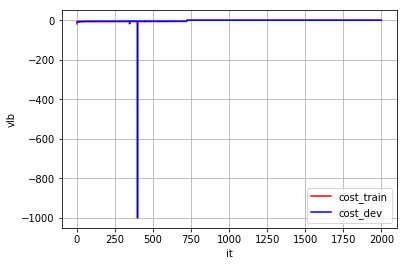

In [21]:
from __future__ import division
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss_cat import VAEAC_gauss_cat_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker

from src.UCI_loader import load_UCI, unnormalise_cat_vars
import numpy as np

masker = top_masker(p=1)

x_train, x_test, x_means, x_stds = \
load_UCI(dset_name='default_credit', splits=10, seed=42, separate_targets=False, save_dir='../data/')

input_dim_vec = [1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,1 ,1, 2] #has this form for targets
print(input_dim_vec)

x_train = unnormalise_cat_vars(x_train, x_means, x_stds, input_dim_vec)
x_test = unnormalise_cat_vars(x_test, x_means, x_stds, input_dim_vec)

print(x_train.shape)
print(x_test.shape)

dname = 'default_credit'
print(dname)

trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_test, transform=None)

save_dir = '../saves/fc_preact_VAEAC_NEW2_' + dname

width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]

batch_size = 64
nb_epochs = 2000
early_stop = 200
lr = 7e-4

cuda = torch.cuda.is_available()

net = VAEAC_gauss_cat_net(input_dim_vec, width, depth, latent_dim, pred_sig=False, lr=lr, cuda=cuda, flatten=True)


vlb_train, vlb_dev = train_VAEAC(net, masker, save_dir, batch_size, nb_epochs, trainset, valset, cuda,
                     flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)





## Under credit with class

In [22]:
%matplotlib inline
from __future__ import division
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss_cat import VAEAC_gauss_cat_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker
from src.UCI_loader import load_UCI, unnormalise_cat_vars
import numpy as np
import torch
from torchvision import datasets, transforms
from VAEAC.under_net import under_VAEAC
from VAE.train import train_VAE
from src.gauss_cat import gauss_cat_to_flat

masker = top_masker(p=1)

dname = 'default_credit'
print(dname)

x_train, x_test, x_means, x_stds = \
load_UCI(dset_name=dname, splits=10, seed=42, separate_targets=False, save_dir='../data/')

input_dim_vec = [1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,1 ,1, 2] #has this form for targets
print(input_dim_vec)

x_train = unnormalise_cat_vars(x_train, x_means, x_stds, input_dim_vec)
x_test = unnormalise_cat_vars(x_test, x_means, x_stds, input_dim_vec)

x_train_flat = gauss_cat_to_flat(torch.Tensor(x_train), input_dim_vec)
x_test_flat = gauss_cat_to_flat(torch.Tensor(x_test), input_dim_vec)


print(x_train_flat.shape)
print(x_test_flat.shape)

trainset = Datafeed(x_train_flat, x_train_flat, transform=None)
valset = Datafeed(x_test_flat, x_test_flat, transform=None)


width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]
lr = 1e-4

cuda = torch.cuda.is_available()

base_network_wraper = VAEAC_gauss_cat_net(input_dim_vec, width, depth, latent_dim, pred_sig=False, 
                                          lr=lr, cuda=cuda, flatten=True)
base_network_wraper.load('../saves/fc_preact_VAEAC_NEW2_' + dname + '_models/theta_best.dat')


base_network = base_network_wraper.model
width = 150
depth = 2
latent_dim = under_latent_dims2[names.index(dname)]

batch_size = 128
nb_epochs = 2000
early_stop = 200
lr = 1e-4

savedir = '../saves/fc_VAEAC_NEW_under2_' + dname  # remove the 2 to remove dimensionality reduction

cuda = torch.cuda.is_available()

under_VAEAC_net = under_VAEAC(base_network, width, depth, latent_dim, lr, cuda=cuda)

vlb_train, vlb_dev = train_VAE(under_VAEAC_net, savedir,
                               batch_size, nb_epochs, trainset, valset, cuda=cuda,
                               flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)




default_credit
[1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
torch.Size([27000, 31])
torch.Size([3000, 31])

Net:
VAE_gauss_net
    Total params: 0.80M
Reading ../saves/fc_preact_VAEAC_NEW2_default_credit_models/theta_best.dat

  restoring epoch: 521, lr: 0.000700

Net:
VAE_gauss_net
    Total params: 0.05M

Network:

Train:
  init cost variables:
it 0/2000, vlb -1783.010472,    time: 1.462102 seconds

    vlb -1380.616755 (-inf)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 1/2000, vlb -1110.788260,    time: 1.473352 seconds

    vlb -860.112516 (-1380.616755)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 2/2000, vlb -713.153555,    time: 1.451355 seconds

    vlb -567.942788 (-860.112516)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 3/2000, vlb -506.414565,    time: 1.434724 seconds

    vlb -399.601654 (-567.942788)

Writting ../saves/fc_VAEAC_NEW_under2_

    vlb -181.490773 (-184.888744)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 50/2000, vlb -208.194653,    time: 1.442723 seconds

    vlb -188.075740 (-181.490773)

it 51/2000, vlb -207.023199,    time: 1.447051 seconds

    vlb -183.012850 (-181.490773)

it 52/2000, vlb -207.753822,    time: 1.468081 seconds

    vlb -187.351197 (-181.490773)

it 53/2000, vlb -207.999406,    time: 1.445306 seconds

    vlb -179.448104 (-181.490773)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 54/2000, vlb -205.183125,    time: 1.434237 seconds

    vlb -180.167741 (-179.448104)

it 55/2000, vlb -205.749807,    time: 1.480465 seconds

    vlb -179.287695 (-179.448104)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 56/2000, vlb -203.348714,    time: 1.469038 seconds

    vlb -183.213472 (-179.287695)

it 57/2000, vlb -202.267901,    time: 1.466184 seconds

    vlb -181.012859 (-179.287695)

it 58/200

    vlb -156.260250 (-157.935556)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 112/2000, vlb -181.713515,    time: 1.458721 seconds

    vlb -154.652868 (-156.260250)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 113/2000, vlb -180.929511,    time: 1.489555 seconds

    vlb -159.562132 (-154.652868)

it 114/2000, vlb -181.064440,    time: 1.442364 seconds

    vlb -158.067647 (-154.652868)

it 115/2000, vlb -180.361039,    time: 1.485854 seconds

    vlb -154.608131 (-154.652868)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 116/2000, vlb -179.906428,    time: 1.497093 seconds

    vlb -154.188367 (-154.608131)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 117/2000, vlb -179.063011,    time: 1.484757 seconds

    vlb -156.866461 (-154.188367)

it 118/2000, vlb -179.106381,    time: 1.481703 seconds

    vlb -156.326207 (-154.188367)

it 119/2000, vlb 

it 174/2000, vlb -162.508784,    time: 1.502878 seconds

    vlb -138.259557 (-136.582606)

it 175/2000, vlb -161.294216,    time: 1.457827 seconds

    vlb -141.807747 (-136.582606)

it 176/2000, vlb -162.003433,    time: 1.443009 seconds

    vlb -138.444595 (-136.582606)

it 177/2000, vlb -163.587551,    time: 1.447002 seconds

    vlb -138.143186 (-136.582606)

it 178/2000, vlb -163.691480,    time: 1.469796 seconds

    vlb -135.251546 (-136.582606)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 179/2000, vlb -161.331648,    time: 1.501098 seconds

    vlb -137.706720 (-135.251546)

it 180/2000, vlb -161.500993,    time: 1.470340 seconds

    vlb -134.236733 (-135.251546)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 181/2000, vlb -160.543160,    time: 1.483362 seconds

    vlb -133.586427 (-134.236733)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 182/2000, vlb -162.437324,    tim

    vlb -132.663847 (-125.611992)

it 243/2000, vlb -153.282230,    time: 1.451922 seconds

    vlb -125.974580 (-125.611992)

it 244/2000, vlb -153.827470,    time: 1.506234 seconds

    vlb -125.327866 (-125.611992)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 245/2000, vlb -153.330046,    time: 1.469614 seconds

    vlb -130.363372 (-125.327866)

it 246/2000, vlb -151.318414,    time: 1.476923 seconds

    vlb -124.282627 (-125.327866)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 247/2000, vlb -152.244802,    time: 1.465643 seconds

    vlb -124.938227 (-124.282627)

it 248/2000, vlb -151.000452,    time: 1.463356 seconds

    vlb -129.764631 (-124.282627)

it 249/2000, vlb -150.947829,    time: 1.443535 seconds

    vlb -126.054318 (-124.282627)

it 250/2000, vlb -151.331412,    time: 1.476139 seconds

    vlb -128.331543 (-124.282627)

it 251/2000, vlb -152.352344,    time: 1.432266 seconds

    vlb -129.329064 

    vlb -120.063187 (-119.620025)

it 313/2000, vlb -147.237875,    time: 1.475865 seconds

    vlb -125.531946 (-119.620025)

it 314/2000, vlb -147.647230,    time: 1.422831 seconds

    vlb -123.226231 (-119.620025)

it 315/2000, vlb -146.394253,    time: 1.429332 seconds

    vlb -123.231080 (-119.620025)

it 316/2000, vlb -145.386499,    time: 1.438521 seconds

    vlb -125.123503 (-119.620025)

it 317/2000, vlb -146.728656,    time: 1.458085 seconds

    vlb -122.597930 (-119.620025)

it 318/2000, vlb -145.758617,    time: 1.449641 seconds

    vlb -118.350510 (-119.620025)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 319/2000, vlb -146.271085,    time: 1.468747 seconds

    vlb -120.728335 (-118.350510)

it 320/2000, vlb -144.291088,    time: 1.458728 seconds

    vlb -125.363472 (-118.350510)

it 321/2000, vlb -145.977520,    time: 1.429773 seconds

    vlb -122.387501 (-118.350510)

it 322/2000, vlb -147.114857,    time: 1.460673 seconds

    

it 384/2000, vlb -143.520896,    time: 1.435459 seconds

    vlb -118.953084 (-115.552474)

it 385/2000, vlb -142.981367,    time: 1.508581 seconds

    vlb -120.816309 (-115.552474)

it 386/2000, vlb -143.854147,    time: 1.443676 seconds

    vlb -119.505871 (-115.552474)

it 387/2000, vlb -143.097847,    time: 1.466097 seconds

    vlb -115.557268 (-115.552474)

it 388/2000, vlb -142.157977,    time: 1.472365 seconds

    vlb -120.514510 (-115.552474)

it 389/2000, vlb -143.666718,    time: 1.414774 seconds

    vlb -120.222433 (-115.552474)

it 390/2000, vlb -144.006509,    time: 1.447490 seconds

    vlb -117.718240 (-115.552474)

it 391/2000, vlb -142.888394,    time: 1.431793 seconds

    vlb -117.857553 (-115.552474)

it 392/2000, vlb -142.349300,    time: 1.434132 seconds

    vlb -119.673050 (-115.552474)

it 393/2000, vlb -142.300696,    time: 1.423270 seconds

    vlb -122.267433 (-115.552474)

it 394/2000, vlb -142.828020,    time: 1.447706 seconds

    vlb -117.749665 (-1

it 458/2000, vlb -139.430333,    time: 1.422287 seconds

    vlb -114.134356 (-113.970228)

it 459/2000, vlb -140.382795,    time: 1.436035 seconds

    vlb -116.603982 (-113.970228)

it 460/2000, vlb -138.679602,    time: 1.466735 seconds

    vlb -116.073228 (-113.970228)

it 461/2000, vlb -140.383099,    time: 1.464260 seconds

    vlb -116.901415 (-113.970228)

it 462/2000, vlb -141.756833,    time: 1.444965 seconds

    vlb -113.998720 (-113.970228)

it 463/2000, vlb -140.639387,    time: 1.459896 seconds

    vlb -116.206952 (-113.970228)

it 464/2000, vlb -140.164333,    time: 1.452836 seconds

    vlb -115.605954 (-113.970228)

it 465/2000, vlb -139.666014,    time: 1.444463 seconds

    vlb -118.589155 (-113.970228)

it 466/2000, vlb -139.582066,    time: 1.430266 seconds

    vlb -114.434252 (-113.970228)

it 467/2000, vlb -139.700955,    time: 1.476391 seconds

    vlb -116.307833 (-113.970228)

it 468/2000, vlb -140.251219,    time: 1.469883 seconds

    vlb -113.512847 (-1

    vlb -115.480148 (-111.647729)

it 530/2000, vlb -137.739259,    time: 1.445648 seconds

    vlb -113.399012 (-111.647729)

it 531/2000, vlb -138.067329,    time: 1.441891 seconds

    vlb -116.571485 (-111.647729)

it 532/2000, vlb -138.719534,    time: 1.427615 seconds

    vlb -113.697428 (-111.647729)

it 533/2000, vlb -137.824569,    time: 1.454301 seconds

    vlb -112.134771 (-111.647729)

it 534/2000, vlb -138.906696,    time: 1.467124 seconds

    vlb -114.395520 (-111.647729)

it 535/2000, vlb -139.530573,    time: 1.447692 seconds

    vlb -114.095518 (-111.647729)

it 536/2000, vlb -137.714103,    time: 1.437510 seconds

    vlb -112.775684 (-111.647729)

it 537/2000, vlb -139.107767,    time: 1.448695 seconds

    vlb -113.054028 (-111.647729)

it 538/2000, vlb -137.719861,    time: 1.439158 seconds

    vlb -114.230714 (-111.647729)

it 539/2000, vlb -137.206816,    time: 1.454160 seconds

    vlb -113.261899 (-111.647729)

it 540/2000, vlb -138.340011,    time: 1.4253

    vlb -112.485475 (-108.905936)

it 601/2000, vlb -135.056436,    time: 1.448198 seconds

    vlb -115.761167 (-108.905936)

it 602/2000, vlb -135.384569,    time: 1.463679 seconds

    vlb -110.903311 (-108.905936)

it 603/2000, vlb -136.957152,    time: 1.461622 seconds

    vlb -113.820922 (-108.905936)

it 604/2000, vlb -134.617948,    time: 1.465367 seconds

    vlb -110.365959 (-108.905936)

it 605/2000, vlb -135.986399,    time: 1.476728 seconds

    vlb -115.041105 (-108.905936)

it 606/2000, vlb -135.468121,    time: 1.418283 seconds

    vlb -112.802277 (-108.905936)

it 607/2000, vlb -136.095936,    time: 1.459005 seconds

    vlb -110.627610 (-108.905936)

it 608/2000, vlb -136.368920,    time: 1.456049 seconds

    vlb -113.623252 (-108.905936)

it 609/2000, vlb -136.963142,    time: 1.506475 seconds

    vlb -116.713414 (-108.905936)

it 610/2000, vlb -134.972477,    time: 1.428454 seconds

    vlb -109.884074 (-108.905936)

it 611/2000, vlb -134.646606,    time: 1.4565

    vlb -112.759027 (-107.872529)

it 674/2000, vlb -133.980183,    time: 1.438478 seconds

    vlb -111.707664 (-107.872529)

it 675/2000, vlb -135.982643,    time: 1.448672 seconds

    vlb -114.399055 (-107.872529)

it 676/2000, vlb -134.627208,    time: 1.442376 seconds

    vlb -112.038510 (-107.872529)

it 677/2000, vlb -134.559907,    time: 1.481792 seconds

    vlb -112.710434 (-107.872529)

it 678/2000, vlb -135.496545,    time: 1.435909 seconds

    vlb -109.932807 (-107.872529)

it 679/2000, vlb -132.635389,    time: 1.489109 seconds

    vlb -110.934887 (-107.872529)

it 680/2000, vlb -134.849925,    time: 1.454623 seconds

    vlb -107.499850 (-107.872529)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 681/2000, vlb -133.917012,    time: 1.459385 seconds

    vlb -111.048595 (-107.499850)

it 682/2000, vlb -134.188172,    time: 1.434758 seconds

    vlb -108.278221 (-107.499850)

it 683/2000, vlb -134.407592,    time: 1.504646 seconds

    

    vlb -108.144525 (-105.959872)

it 747/2000, vlb -133.566983,    time: 1.429437 seconds

    vlb -106.800923 (-105.959872)

it 748/2000, vlb -132.121274,    time: 1.455240 seconds

    vlb -113.676972 (-105.959872)

it 749/2000, vlb -134.785226,    time: 1.455150 seconds

    vlb -107.008635 (-105.959872)

it 750/2000, vlb -133.493559,    time: 1.451839 seconds

    vlb -106.598279 (-105.959872)

it 751/2000, vlb -131.495857,    time: 1.453906 seconds

    vlb -108.377129 (-105.959872)

it 752/2000, vlb -131.072434,    time: 1.438994 seconds

    vlb -108.785154 (-105.959872)

it 753/2000, vlb -133.712638,    time: 1.501619 seconds

    vlb -111.212431 (-105.959872)

it 754/2000, vlb -132.728047,    time: 1.480508 seconds

    vlb -112.246167 (-105.959872)

it 755/2000, vlb -133.921605,    time: 1.459347 seconds

    vlb -109.157702 (-105.959872)

it 756/2000, vlb -133.892427,    time: 1.457539 seconds

    vlb -109.202024 (-105.959872)

it 757/2000, vlb -131.772022,    time: 1.4532

    vlb -107.145645 (-103.947954)

it 821/2000, vlb -132.557808,    time: 1.451043 seconds

    vlb -109.980916 (-103.947954)

it 822/2000, vlb -129.411697,    time: 1.446224 seconds

    vlb -108.868198 (-103.947954)

it 823/2000, vlb -131.076107,    time: 1.458912 seconds

    vlb -108.712045 (-103.947954)

it 824/2000, vlb -132.323249,    time: 1.439887 seconds

    vlb -109.025632 (-103.947954)

it 825/2000, vlb -131.250435,    time: 1.445346 seconds

    vlb -105.458643 (-103.947954)

it 826/2000, vlb -133.387282,    time: 1.440609 seconds

    vlb -109.581957 (-103.947954)

it 827/2000, vlb -131.480046,    time: 1.423722 seconds

    vlb -109.649997 (-103.947954)

it 828/2000, vlb -129.574295,    time: 1.424111 seconds

    vlb -107.056067 (-103.947954)

it 829/2000, vlb -131.180503,    time: 1.451006 seconds

    vlb -109.917612 (-103.947954)

it 830/2000, vlb -130.819395,    time: 1.441430 seconds

    vlb -107.267300 (-103.947954)

it 831/2000, vlb -131.004028,    time: 1.4824

    vlb -106.872352 (-102.684025)

it 895/2000, vlb -128.954507,    time: 1.452855 seconds

    vlb -109.380683 (-102.684025)

it 896/2000, vlb -130.157515,    time: 1.467126 seconds

    vlb -106.919766 (-102.684025)

it 897/2000, vlb -129.161822,    time: 1.453603 seconds

    vlb -108.663625 (-102.684025)

it 898/2000, vlb -130.105973,    time: 1.422671 seconds

    vlb -107.230462 (-102.684025)

it 899/2000, vlb -129.984223,    time: 1.415086 seconds

    vlb -105.828346 (-102.684025)

it 900/2000, vlb -130.263075,    time: 1.474769 seconds

    vlb -108.002241 (-102.684025)

it 901/2000, vlb -130.038263,    time: 1.431096 seconds

    vlb -106.651146 (-102.684025)

it 902/2000, vlb -128.977074,    time: 1.427715 seconds

    vlb -105.815373 (-102.684025)

it 903/2000, vlb -129.626928,    time: 1.467706 seconds

    vlb -105.068850 (-102.684025)

it 904/2000, vlb -129.648639,    time: 1.477449 seconds

    vlb -106.522581 (-102.684025)

it 905/2000, vlb -129.840685,    time: 1.4176

    vlb -107.778270 (-102.684025)

it 970/2000, vlb -130.330707,    time: 1.447171 seconds

    vlb -102.958683 (-102.684025)

it 971/2000, vlb -127.882140,    time: 1.436256 seconds

    vlb -102.043411 (-102.684025)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 972/2000, vlb -128.744100,    time: 1.438353 seconds

    vlb -106.202160 (-102.043411)

it 973/2000, vlb -128.567156,    time: 1.432732 seconds

    vlb -107.676328 (-102.043411)

it 974/2000, vlb -128.303754,    time: 1.443495 seconds

    vlb -105.762110 (-102.043411)

it 975/2000, vlb -128.881298,    time: 1.473209 seconds

    vlb -107.578579 (-102.043411)

it 976/2000, vlb -129.276170,    time: 1.459361 seconds

    vlb -107.842990 (-102.043411)

it 977/2000, vlb -130.291250,    time: 1.449835 seconds

    vlb -105.243593 (-102.043411)

it 978/2000, vlb -127.564518,    time: 1.450682 seconds

    vlb -107.495374 (-102.043411)

it 979/2000, vlb -128.159311,    time: 1.466955 seconds

    

    vlb -103.880293 (-100.959420)

it 1043/2000, vlb -126.733721,    time: 1.436788 seconds

    vlb -105.817602 (-100.959420)

it 1044/2000, vlb -126.795128,    time: 1.460805 seconds

    vlb -106.089329 (-100.959420)

it 1045/2000, vlb -127.717746,    time: 1.435978 seconds

    vlb -105.976435 (-100.959420)

it 1046/2000, vlb -126.844533,    time: 1.453595 seconds

    vlb -104.200352 (-100.959420)

it 1047/2000, vlb -127.427021,    time: 1.460340 seconds

    vlb -102.563244 (-100.959420)

it 1048/2000, vlb -126.932608,    time: 1.451751 seconds

    vlb -103.149359 (-100.959420)

it 1049/2000, vlb -126.125394,    time: 1.459736 seconds

    vlb -103.006082 (-100.959420)

it 1050/2000, vlb -127.335854,    time: 1.437427 seconds

    vlb -105.205547 (-100.959420)

it 1051/2000, vlb -127.042139,    time: 1.426233 seconds

    vlb -103.168573 (-100.959420)

it 1052/2000, vlb -127.238804,    time: 1.450217 seconds

    vlb -101.825188 (-100.959420)

it 1053/2000, vlb -124.870712,    t

it 1116/2000, vlb -126.250298,    time: 1.451648 seconds

    vlb -103.541709 (-100.872184)

it 1117/2000, vlb -127.586607,    time: 1.449245 seconds

    vlb -102.592253 (-100.872184)

it 1118/2000, vlb -127.322318,    time: 1.438528 seconds

    vlb -104.827845 (-100.872184)

it 1119/2000, vlb -127.274070,    time: 1.454894 seconds

    vlb -103.521413 (-100.872184)

it 1120/2000, vlb -126.747654,    time: 1.484449 seconds

    vlb -102.542941 (-100.872184)

it 1121/2000, vlb -127.819232,    time: 1.426116 seconds

    vlb -104.798303 (-100.872184)

it 1122/2000, vlb -126.994211,    time: 1.451290 seconds

    vlb -102.186592 (-100.872184)

it 1123/2000, vlb -126.280631,    time: 1.447953 seconds

    vlb -101.598070 (-100.872184)

it 1124/2000, vlb -126.920638,    time: 1.435605 seconds

    vlb -103.640867 (-100.872184)

it 1125/2000, vlb -125.416813,    time: 1.464179 seconds

    vlb -101.064385 (-100.872184)

it 1126/2000, vlb -124.983041,    time: 1.429991 seconds

    vlb -104

it 1189/2000, vlb -124.430376,    time: 1.452141 seconds

    vlb -101.552566 (-97.900988)

it 1190/2000, vlb -124.126849,    time: 1.468157 seconds

    vlb -99.192564 (-97.900988)

it 1191/2000, vlb -124.450314,    time: 1.436030 seconds

    vlb -102.328254 (-97.900988)

it 1192/2000, vlb -124.800466,    time: 1.450146 seconds

    vlb -103.651618 (-97.900988)

it 1193/2000, vlb -125.075784,    time: 1.443765 seconds

    vlb -104.133809 (-97.900988)

it 1194/2000, vlb -124.586037,    time: 1.429304 seconds

    vlb -101.601448 (-97.900988)

it 1195/2000, vlb -124.251634,    time: 1.446316 seconds

    vlb -104.181017 (-97.900988)

it 1196/2000, vlb -124.311288,    time: 1.437851 seconds

    vlb -104.340240 (-97.900988)

it 1197/2000, vlb -124.453448,    time: 1.458783 seconds

    vlb -101.399220 (-97.900988)

it 1198/2000, vlb -124.988574,    time: 1.446410 seconds

    vlb -102.668712 (-97.900988)

it 1199/2000, vlb -126.637466,    time: 1.462654 seconds

    vlb -102.579879 (-9

    vlb -100.076299 (-97.900988)

it 1264/2000, vlb -123.512146,    time: 1.447380 seconds

    vlb -100.947935 (-97.900988)

it 1265/2000, vlb -123.923749,    time: 1.429431 seconds

    vlb -102.554513 (-97.900988)

it 1266/2000, vlb -125.044061,    time: 1.426915 seconds

    vlb -100.159532 (-97.900988)

it 1267/2000, vlb -124.192752,    time: 1.473365 seconds

    vlb -99.763828 (-97.900988)

it 1268/2000, vlb -123.273142,    time: 1.482999 seconds

    vlb -101.652878 (-97.900988)

it 1269/2000, vlb -126.041468,    time: 1.474212 seconds

    vlb -101.294405 (-97.900988)

it 1270/2000, vlb -125.150394,    time: 1.422380 seconds

    vlb -102.585902 (-97.900988)

it 1271/2000, vlb -125.474595,    time: 1.457542 seconds

    vlb -101.244507 (-97.900988)

it 1272/2000, vlb -123.194099,    time: 1.459173 seconds

    vlb -102.188903 (-97.900988)

it 1273/2000, vlb -123.596715,    time: 1.444803 seconds

    vlb -101.350527 (-97.900988)

it 1274/2000, vlb -123.630440,    time: 1.44675

    vlb -102.879593 (-97.426237)

it 1338/2000, vlb -123.291022,    time: 1.429645 seconds

    vlb -96.969940 (-97.426237)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 1339/2000, vlb -123.592690,    time: 1.484934 seconds

    vlb -101.759989 (-96.969940)

it 1340/2000, vlb -122.471312,    time: 1.438923 seconds

    vlb -102.223598 (-96.969940)

it 1341/2000, vlb -124.224652,    time: 1.459099 seconds

    vlb -98.004213 (-96.969940)

it 1342/2000, vlb -121.331398,    time: 1.455657 seconds

    vlb -101.516691 (-96.969940)

it 1343/2000, vlb -122.521745,    time: 1.415338 seconds

    vlb -100.622175 (-96.969940)

it 1344/2000, vlb -123.560296,    time: 1.455924 seconds

    vlb -101.288051 (-96.969940)

it 1345/2000, vlb -121.737740,    time: 1.469136 seconds

    vlb -96.582698 (-96.969940)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 1346/2000, vlb -124.452314,    time: 1.471508 seconds

    vlb -101.519148 (-9

it 1411/2000, vlb -121.632563,    time: 1.429116 seconds

    vlb -103.130169 (-96.582698)

it 1412/2000, vlb -122.254022,    time: 1.437138 seconds

    vlb -103.662449 (-96.582698)

it 1413/2000, vlb -122.023730,    time: 1.443537 seconds

    vlb -99.517738 (-96.582698)

it 1414/2000, vlb -121.131216,    time: 1.451029 seconds

    vlb -98.896842 (-96.582698)

it 1415/2000, vlb -121.638933,    time: 1.446593 seconds

    vlb -98.732186 (-96.582698)

it 1416/2000, vlb -122.043956,    time: 1.445128 seconds

    vlb -96.439918 (-96.582698)

Writting ../saves/fc_VAEAC_NEW_under2_default_credit_models/theta_best.dat

it 1417/2000, vlb -123.899550,    time: 1.509222 seconds

    vlb -100.666596 (-96.439918)

it 1418/2000, vlb -121.686352,    time: 1.450680 seconds

    vlb -100.952395 (-96.439918)

it 1419/2000, vlb -122.899563,    time: 1.451271 seconds

    vlb -96.918261 (-96.439918)

it 1420/2000, vlb -123.602266,    time: 1.454116 seconds

    vlb -100.451249 (-96.439918)

it 1421/2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Compas with class







('Compas', (5554, 19), (618, 19))
[3 6 2 2 2 1 1 2]
compas

Net:
VAE_gauss_net
    Total params: 0.78M

Network:

Train:
  init cost variables:
it 0/2000, vlb -1349.275611,    time: 0.669075 seconds

    vlb -6283.187592 (-inf)

Writting ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

it 1/2000, vlb -845.415113,    time: 0.706004 seconds

    vlb -324.181809 (-6283.187592)

Writting ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

it 2/2000, vlb -371.668748,    time: 0.716552 seconds

    vlb -445.055874 (-324.181809)

it 3/2000, vlb -354.550459,    time: 0.677146 seconds

    vlb -671.532293 (-324.181809)

it 4/2000, vlb -266.823119,    time: 0.675080 seconds

    vlb -128.459870 (-324.181809)

Writting ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

it 5/2000, vlb -1101.263123,    time: 0.702239 seconds

    vlb -151.640714 (-128.459870)

it 6/2000, vlb -174.138223,    time: 0.681745 seconds

    vlb -225.885081 (-128.459870)

it 7/2000, vlb -117

    vlb -7.728128 (-7.121498)

it 63/2000, vlb -8.399617,    time: 0.662940 seconds

    vlb -6.630324 (-7.121498)

Writting ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

it 64/2000, vlb -8.828337,    time: 0.683947 seconds

    vlb -6.330021 (-6.630324)

Writting ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

it 65/2000, vlb -8.297010,    time: 0.677825 seconds

    vlb -6.775066 (-6.330021)

it 66/2000, vlb -8.518660,    time: 0.655786 seconds

    vlb -7.369503 (-6.330021)

it 67/2000, vlb -8.292143,    time: 0.654672 seconds

    vlb -6.855629 (-6.330021)

it 68/2000, vlb -8.426227,    time: 0.661167 seconds

    vlb -6.366546 (-6.330021)

it 69/2000, vlb -7.964971,    time: 0.665594 seconds

    vlb -6.873202 (-6.330021)

it 70/2000, vlb -7.825804,    time: 0.654431 seconds

    vlb -7.493713 (-6.330021)

it 71/2000, vlb -8.029031,    time: 0.657955 seconds

    vlb -7.423809 (-6.330021)

it 72/2000, vlb -7.450008,    time: 0.662095 seconds

    vlb -6.103

it 128/2000, vlb -5.277591,    time: 0.663287 seconds

    vlb -8.877594 (-4.103774)

it 129/2000, vlb -5.232017,    time: 0.663710 seconds

    vlb -5.142952 (-4.103774)

it 130/2000, vlb -5.263462,    time: 0.667268 seconds

    vlb -4.175171 (-4.103774)

it 131/2000, vlb -5.301093,    time: 0.666536 seconds

    vlb -4.372410 (-4.103774)

it 132/2000, vlb -5.269874,    time: 0.663060 seconds

    vlb -4.639495 (-4.103774)

it 133/2000, vlb -5.213039,    time: 0.666340 seconds

    vlb -4.255693 (-4.103774)

it 134/2000, vlb -5.190247,    time: 0.645473 seconds

    vlb -4.214205 (-4.103774)

it 135/2000, vlb -5.166623,    time: 0.654421 seconds

    vlb -5.503938 (-4.103774)

it 136/2000, vlb -5.145029,    time: 0.665420 seconds

    vlb -4.809662 (-4.103774)

it 137/2000, vlb -5.364005,    time: 0.671373 seconds

    vlb -5.209086 (-4.103774)

it 138/2000, vlb -5.200536,    time: 0.657738 seconds

    vlb -4.425953 (-4.103774)

it 139/2000, vlb -5.090074,    time: 0.671981 seconds


it 201/2000, vlb -4.452199,    time: 0.663445 seconds

    vlb -3.247113 (-3.293292)

Writting ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

it 202/2000, vlb -4.427527,    time: 0.699354 seconds

    vlb -3.771159 (-3.247113)

it 203/2000, vlb -4.424102,    time: 0.664988 seconds

    vlb -3.316256 (-3.247113)

it 204/2000, vlb -4.444439,    time: 0.650829 seconds

    vlb -3.496157 (-3.247113)

it 205/2000, vlb -4.327603,    time: 0.654542 seconds

    vlb -3.298883 (-3.247113)

it 206/2000, vlb -4.391430,    time: 0.654163 seconds

    vlb -3.280258 (-3.247113)

it 207/2000, vlb -4.434483,    time: 0.645630 seconds

    vlb -3.301571 (-3.247113)

it 208/2000, vlb -4.349239,    time: 0.662939 seconds

    vlb -3.318142 (-3.247113)

it 209/2000, vlb -4.397351,    time: 0.655535 seconds

    vlb -3.217045 (-3.247113)

Writting ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

it 210/2000, vlb -4.352269,    time: 0.695513 seconds

    vlb -4.295200 (-3.217045)

it 2

    vlb -3.021404 (-2.839978)

it 271/2000, vlb -3.854512,    time: 0.655496 seconds

    vlb -2.905717 (-2.839978)

it 272/2000, vlb -3.836686,    time: 0.660307 seconds

    vlb -2.869614 (-2.839978)

it 273/2000, vlb -3.863556,    time: 0.662995 seconds

    vlb -2.892628 (-2.839978)

it 274/2000, vlb -3.916667,    time: 0.655701 seconds

    vlb -2.981955 (-2.839978)

it 275/2000, vlb -3.829390,    time: 0.653729 seconds

    vlb -2.872925 (-2.839978)

it 276/2000, vlb -3.870033,    time: 0.655118 seconds

    vlb -3.703275 (-2.839978)

it 277/2000, vlb -3.848664,    time: 0.659410 seconds

    vlb -3.026310 (-2.839978)

it 278/2000, vlb -3.837691,    time: 0.666497 seconds

    vlb -5.403912 (-2.839978)

it 279/2000, vlb -3.828960,    time: 0.661961 seconds

    vlb -3.044637 (-2.839978)

it 280/2000, vlb -3.835632,    time: 0.653977 seconds

    vlb -3.483814 (-2.839978)

it 281/2000, vlb -3.826494,    time: 0.660479 seconds

    vlb -3.208206 (-2.839978)

it 282/2000, vlb -3.796

    vlb -2.523889 (-2.536707)

Writting ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

it 347/2000, vlb -3.456210,    time: 0.682149 seconds

    vlb -2.598030 (-2.523889)

it 348/2000, vlb -3.470396,    time: 0.673929 seconds

    vlb -2.706230 (-2.523889)

it 349/2000, vlb -3.414964,    time: 0.659222 seconds

    vlb -2.632256 (-2.523889)

it 350/2000, vlb -3.394912,    time: 0.650898 seconds

    vlb -2.575534 (-2.523889)

it 351/2000, vlb -3.484375,    time: 0.653433 seconds

    vlb -2.578138 (-2.523889)

it 352/2000, vlb -3.399668,    time: 0.652737 seconds

    vlb -2.471514 (-2.523889)

Writting ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

it 353/2000, vlb -3.464754,    time: 0.658823 seconds

    vlb -2.516696 (-2.471514)

it 354/2000, vlb -3.389239,    time: 0.659933 seconds

    vlb -2.610733 (-2.471514)

it 355/2000, vlb -3.414184,    time: 0.669062 seconds

    vlb -2.531024 (-2.471514)

it 356/2000, vlb -3.394355,    time: 0.651876 seconds

    

    vlb -2.524481 (-2.288520)

it 420/2000, vlb -3.206037,    time: 0.663405 seconds

    vlb -2.425581 (-2.288520)

it 421/2000, vlb -3.157124,    time: 0.653844 seconds

    vlb -2.358832 (-2.288520)

it 422/2000, vlb -3.189516,    time: 0.647547 seconds

    vlb -2.292360 (-2.288520)

it 423/2000, vlb -3.116231,    time: 0.656731 seconds

    vlb -2.383414 (-2.288520)

it 424/2000, vlb -3.131364,    time: 0.656922 seconds

    vlb -2.407241 (-2.288520)

it 425/2000, vlb -3.071545,    time: 0.653704 seconds

    vlb -2.366599 (-2.288520)

it 426/2000, vlb -3.125182,    time: 0.664480 seconds

    vlb -2.422287 (-2.288520)

it 427/2000, vlb -3.112651,    time: 0.659160 seconds

    vlb -2.431281 (-2.288520)

it 428/2000, vlb -3.136392,    time: 0.657320 seconds

    vlb -2.422347 (-2.288520)

it 429/2000, vlb -3.123620,    time: 0.649231 seconds

    vlb -2.432256 (-2.288520)

it 430/2000, vlb -3.175202,    time: 0.657574 seconds

    vlb -2.392269 (-2.288520)

it 431/2000, vlb -3.126

    vlb -2.404853 (-2.185344)

it 496/2000, vlb -2.981443,    time: 0.654755 seconds

    vlb -2.246040 (-2.185344)

it 497/2000, vlb -3.009571,    time: 0.655920 seconds

    vlb -2.200383 (-2.185344)

it 498/2000, vlb -2.931119,    time: 0.648365 seconds

    vlb -2.399383 (-2.185344)

it 499/2000, vlb -2.946807,    time: 0.659288 seconds

    vlb -2.340848 (-2.185344)

it 500/2000, vlb -3.057154,    time: 0.659470 seconds

    vlb -2.294180 (-2.185344)

it 501/2000, vlb -2.985929,    time: 0.659731 seconds

    vlb -2.303473 (-2.185344)

it 502/2000, vlb -3.001624,    time: 0.651453 seconds

    vlb -2.230270 (-2.185344)

it 503/2000, vlb -2.999329,    time: 0.659981 seconds

    vlb -2.383524 (-2.185344)

it 504/2000, vlb -3.014953,    time: 0.642375 seconds

    vlb -2.336113 (-2.185344)

it 505/2000, vlb -2.950510,    time: 0.647474 seconds

    vlb -2.310028 (-2.185344)

it 506/2000, vlb -2.953251,    time: 0.656324 seconds

    vlb -2.319233 (-2.185344)

it 507/2000, vlb -2.932

it 573/2000, vlb -2.887675,    time: 0.663004 seconds

    vlb -2.292798 (-2.136258)

it 574/2000, vlb -2.884383,    time: 0.652134 seconds

    vlb -2.232010 (-2.136258)

it 575/2000, vlb -2.896402,    time: 0.657250 seconds

    vlb -2.258827 (-2.136258)

it 576/2000, vlb -2.849862,    time: 0.665450 seconds

    vlb -2.286981 (-2.136258)

it 577/2000, vlb -2.915839,    time: 0.659921 seconds

    vlb -2.251620 (-2.136258)

it 578/2000, vlb -2.872465,    time: 0.650475 seconds

    vlb -2.279641 (-2.136258)

it 579/2000, vlb -2.907268,    time: 0.653518 seconds

    vlb -2.362656 (-2.136258)

it 580/2000, vlb -2.860522,    time: 0.657221 seconds

    vlb -2.358904 (-2.136258)

it 581/2000, vlb -2.874655,    time: 0.656728 seconds

    vlb -2.235732 (-2.136258)

it 582/2000, vlb -2.906709,    time: 0.649025 seconds

    vlb -2.237724 (-2.136258)

it 583/2000, vlb -2.913016,    time: 0.660525 seconds

    vlb -2.274857 (-2.136258)

it 584/2000, vlb -2.851065,    time: 0.658746 seconds


    vlb -2.170813 (-2.087139)

it 650/2000, vlb -2.849622,    time: 0.648957 seconds

    vlb -2.376227 (-2.087139)

it 651/2000, vlb -2.825627,    time: 0.665840 seconds

    vlb -2.321554 (-2.087139)

it 652/2000, vlb -2.805500,    time: 0.658240 seconds

    vlb -2.286334 (-2.087139)

it 653/2000, vlb -2.839481,    time: 0.657558 seconds

    vlb -2.171087 (-2.087139)

it 654/2000, vlb -2.839155,    time: 0.669578 seconds

    vlb -2.390793 (-2.087139)

it 655/2000, vlb -2.850546,    time: 0.650756 seconds

    vlb -2.054616 (-2.087139)

Writting ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

it 656/2000, vlb -2.830077,    time: 0.678616 seconds

    vlb -2.355029 (-2.054616)

it 657/2000, vlb -2.867798,    time: 0.651535 seconds

    vlb -2.256296 (-2.054616)

it 658/2000, vlb -2.836785,    time: 0.657503 seconds

    vlb -2.202562 (-2.054616)

it 659/2000, vlb -2.829379,    time: 0.673180 seconds

    vlb -2.378392 (-2.054616)

it 660/2000, vlb -2.854520,    time: 0.65

it 728/2000, vlb -2.796504,    time: 0.651724 seconds

    vlb -2.211094 (-2.054616)

it 729/2000, vlb -2.801153,    time: 0.661606 seconds

    vlb -2.231644 (-2.054616)

it 730/2000, vlb -2.744946,    time: 0.653402 seconds

    vlb -2.307095 (-2.054616)

it 731/2000, vlb -2.799677,    time: 0.652705 seconds

    vlb -2.142144 (-2.054616)

it 732/2000, vlb -2.791041,    time: 0.660813 seconds

    vlb -2.261343 (-2.054616)

it 733/2000, vlb -2.817722,    time: 0.657347 seconds

    vlb -2.209694 (-2.054616)

it 734/2000, vlb -2.793377,    time: 0.664178 seconds

    vlb -2.188516 (-2.054616)

it 735/2000, vlb -2.810696,    time: 0.659332 seconds

    vlb -2.295022 (-2.054616)

it 736/2000, vlb -2.825348,    time: 0.659071 seconds

    vlb -2.204467 (-2.054616)

it 737/2000, vlb -2.774013,    time: 0.650034 seconds

    vlb -2.174592 (-2.054616)

it 738/2000, vlb -2.789815,    time: 0.663738 seconds

    vlb -2.076470 (-2.054616)

it 739/2000, vlb -2.746122,    time: 0.657230 seconds


it 807/2000, vlb -2.746152,    time: 0.655308 seconds

    vlb -2.268181 (-2.054616)

it 808/2000, vlb -2.796643,    time: 0.668003 seconds

    vlb -2.131772 (-2.054616)

it 809/2000, vlb -2.747913,    time: 0.657036 seconds

    vlb -2.102855 (-2.054616)

it 810/2000, vlb -2.732031,    time: 0.654478 seconds

    vlb -2.143946 (-2.054616)

it 811/2000, vlb -2.770091,    time: 0.658920 seconds

    vlb -2.260414 (-2.054616)

it 812/2000, vlb -2.773764,    time: 0.664914 seconds

    vlb -2.275717 (-2.054616)

it 813/2000, vlb -2.799568,    time: 0.651137 seconds

    vlb -2.092801 (-2.054616)

it 814/2000, vlb -2.743024,    time: 0.663780 seconds

    vlb -2.293794 (-2.054616)

it 815/2000, vlb -2.766443,    time: 0.661747 seconds

    vlb -2.140672 (-2.054616)

it 816/2000, vlb -2.841662,    time: 0.654610 seconds

    vlb -2.290444 (-2.054616)

it 817/2000, vlb -2.781387,    time: 0.666468 seconds

    vlb -2.193255 (-2.054616)

it 818/2000, vlb -2.786411,    time: 0.658308 seconds


    vlb -2.257659 (-2.038170)

it 885/2000, vlb -2.760807,    time: 0.655794 seconds

    vlb -2.305445 (-2.038170)

it 886/2000, vlb -2.759873,    time: 0.661902 seconds

    vlb -2.241380 (-2.038170)

it 887/2000, vlb -2.732780,    time: 0.657635 seconds

    vlb -2.254796 (-2.038170)

it 888/2000, vlb -2.729298,    time: 0.654405 seconds

    vlb -2.332136 (-2.038170)

it 889/2000, vlb -2.794120,    time: 0.650889 seconds

    vlb -2.219063 (-2.038170)

it 890/2000, vlb -2.767482,    time: 0.660751 seconds

    vlb -2.195075 (-2.038170)

it 891/2000, vlb -2.732471,    time: 0.657360 seconds

    vlb -2.349281 (-2.038170)

it 892/2000, vlb -2.747980,    time: 0.646360 seconds

    vlb -2.223911 (-2.038170)

it 893/2000, vlb -2.745354,    time: 0.661915 seconds

    vlb -2.091468 (-2.038170)

it 894/2000, vlb -2.745874,    time: 0.641990 seconds

    vlb -2.177539 (-2.038170)

it 895/2000, vlb -2.755998,    time: 0.654009 seconds

    vlb -2.201256 (-2.038170)

it 896/2000, vlb -2.722

    vlb -2.184328 (-2.038170)

it 964/2000, vlb -2.739799,    time: 0.658628 seconds

    vlb -2.184863 (-2.038170)

it 965/2000, vlb -2.768204,    time: 0.655158 seconds

    vlb -2.233313 (-2.038170)

it 966/2000, vlb -2.740590,    time: 0.655769 seconds

    vlb -2.093665 (-2.038170)

it 967/2000, vlb -2.745308,    time: 0.656631 seconds

    vlb -2.079811 (-2.038170)

it 968/2000, vlb -2.766488,    time: 0.650397 seconds

    vlb -2.246728 (-2.038170)

it 969/2000, vlb -2.740148,    time: 0.653696 seconds

    vlb -2.231473 (-2.038170)

it 970/2000, vlb -2.733694,    time: 0.658042 seconds

    vlb -2.258067 (-2.038170)

it 971/2000, vlb -2.764850,    time: 0.667170 seconds

    vlb -2.123337 (-2.038170)

it 972/2000, vlb -2.727685,    time: 0.650727 seconds

    vlb -2.263986 (-2.038170)

it 973/2000, vlb -2.686870,    time: 0.670452 seconds

    vlb -2.137879 (-2.038170)

it 974/2000, vlb -2.721685,    time: 0.664834 seconds

    vlb -2.246684 (-2.038170)

it 975/2000, vlb -2.741

it 1042/2000, vlb -2.691019,    time: 0.649612 seconds

    vlb -2.182002 (-2.038170)

it 1043/2000, vlb -2.718341,    time: 0.657330 seconds

    vlb -2.193616 (-2.038170)

it 1044/2000, vlb -2.721908,    time: 0.667189 seconds

    vlb -2.171341 (-2.038170)

it 1045/2000, vlb -2.775518,    time: 0.662948 seconds

    vlb -2.166298 (-2.038170)

it 1046/2000, vlb -2.750550,    time: 0.647576 seconds

    vlb -2.168805 (-2.038170)

it 1047/2000, vlb -2.739416,    time: 0.649449 seconds

    vlb -2.317692 (-2.038170)

it 1048/2000, vlb -2.700132,    time: 0.649691 seconds

    vlb -2.197620 (-2.038170)

it 1049/2000, vlb -2.715153,    time: 0.658710 seconds

    vlb -2.163935 (-2.038170)

it 1050/2000, vlb -2.718976,    time: 0.663523 seconds

    vlb -2.294543 (-2.038170)

it 1051/2000, vlb -2.770219,    time: 0.647319 seconds

    vlb -2.282213 (-2.038170)

it 1052/2000, vlb -2.750894,    time: 0.651850 seconds

    vlb -2.120697 (-2.038170)

it 1053/2000, vlb -2.685735,    time: 0.659

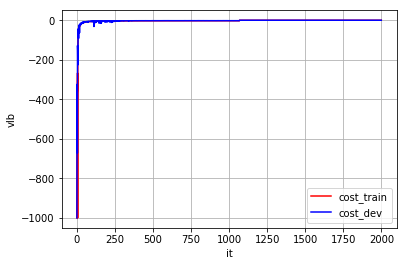

In [10]:
from __future__ import division
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss_cat import VAEAC_gauss_cat_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker

from src.compas_loader import get_my_COMPAS, X_dims_to_input_dim_vec, join_compas_targets

masker = top_masker(p=1)

x_train, x_test, x_means, x_stds, y_train, y_test, feature_names, X_dims = \
    get_my_COMPAS(rseed=42, separate_test=True, test_ratio=0.1, save_dir='../data/')
x_train, x_test, input_dim_vec = join_compas_targets(x_train, x_test, y_train, y_test, X_dims)
print('Compas', x_train.shape, x_test.shape)
print(input_dim_vec)

dname = 'compas'
print(dname)

trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_test, transform=None)

save_dir = '../saves/fc_preact_VAEAC_NEW_' + dname

width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]

batch_size = 128
nb_epochs = 2000
early_stop = 200
lr = 1e-4

cuda = torch.cuda.is_available()

net = VAEAC_gauss_cat_net(input_dim_vec, width, depth, latent_dim, pred_sig=False, lr=lr,
                          cuda=cuda, flatten=False)


vlb_train, vlb_dev = train_VAEAC(net, masker, save_dir, batch_size, nb_epochs, trainset, valset, cuda,
                     flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)



## Under Compas

In [19]:
%matplotlib inline
from __future__ import division
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss_cat import VAEAC_gauss_cat_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker

from src.compas_loader import get_my_COMPAS, X_dims_to_input_dim_vec, join_compas_targets
import torch
from torchvision import datasets, transforms
from VAEAC.under_net import under_VAEAC
from VAE.train import train_VAE
from src.compas_loader import get_my_COMPAS, X_dims_to_input_dim_vec, join_compas_targets

masker = top_masker(p=1)

dname = 'compas'
print(dname)

x_train, x_test, x_means, x_stds, y_train, y_test, feature_names, X_dims = \
    get_my_COMPAS(rseed=42, separate_test=True, test_ratio=0.1, save_dir='../data/')
x_train, x_test, input_dim_vec = join_compas_targets(x_train, x_test, y_train, y_test, X_dims)
print('Compas', x_train.shape, x_test.shape)
print(input_dim_vec)


trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_test, transform=None)


width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]
lr = 1e-4

cuda = torch.cuda.is_available()

base_network_wraper = VAEAC_gauss_cat_net(input_dim_vec, width, depth, latent_dim, pred_sig=False, lr=lr,
                                          cuda=cuda, flatten=False)
base_network_wraper.load('../saves/fc_preact_VAEAC_NEW_' + dname + '_models/theta_best.dat')


base_network = base_network_wraper.model
width = 150
depth = 2
latent_dim = under_latent_dims[names.index(dname)]

batch_size = 128
nb_epochs = 2000
early_stop = 200
lr = 1e-4

savedir = '../saves/fc_VAEAC_NEW_under2_' + dname

cuda = torch.cuda.is_available()

under_VAEAC_net = under_VAEAC(base_network, width, depth, latent_dim, lr, cuda=cuda)
%matplotlib inline
vlb_train, vlb_dev = train_VAE(under_VAEAC_net, savedir,
                               batch_size, nb_epochs, trainset, valset, cuda=cuda,
                               flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)




compas






('Compas', (5554, 19), (618, 19))
[3 6 2 2 2 1 1 2]

Net:
VAE_gauss_net
    Total params: 0.78M
Reading ../saves/fc_preact_VAEAC_NEW_compas_models/theta_best.dat

  restoring epoch: 867, lr: 0.000100

Net:
VAE_gauss_net
    Total params: 0.05M

Network:

Train:
  init cost variables:
it 0/2000, vlb -15.774735,    time: 0.526749 seconds

    vlb -12.470349 (-inf)

Writting ../saves/fc_VAEAC_NEW_under2_compas_models/theta_best.dat

it 1/2000, vlb -10.810530,    time: 0.500903 seconds

    vlb -9.925370 (-12.470349)

Writting ../saves/fc_VAEAC_NEW_under2_compas_models/theta_best.dat

it 2/2000, vlb -9.800606,    time: 0.554294 seconds

    vlb -9.306270 (-9.925370)

Writting ../saves/fc_VAEAC_NEW_under2_compas_models/theta_best.dat

it 3/2000, vlb -9.322523,    time: 0.532370 seconds

    vlb -8.961898 (-9.306270)

Writting ../saves/fc_VAEAC_NEW_under2_compas_models/theta_best.dat

it 4/2000, vlb -8.875198,    time: 0.531803 seconds

    vlb -8.466510 (-8.961898)

Writting ..

it 60/2000, vlb -6.359647,    time: 0.476099 seconds

    vlb -6.264469 (-6.058230)

it 61/2000, vlb -6.423430,    time: 0.452582 seconds

    vlb -6.106683 (-6.058230)

it 62/2000, vlb -6.355279,    time: 0.472930 seconds

    vlb -6.104909 (-6.058230)

it 63/2000, vlb -6.323581,    time: 0.523686 seconds

    vlb -6.163886 (-6.058230)

it 64/2000, vlb -6.308110,    time: 0.445699 seconds

    vlb -6.167784 (-6.058230)

it 65/2000, vlb -6.369233,    time: 0.492134 seconds

    vlb -6.157671 (-6.058230)

it 66/2000, vlb -6.334119,    time: 0.559349 seconds

    vlb -6.161846 (-6.058230)

it 67/2000, vlb -6.261024,    time: 0.518428 seconds

    vlb -6.198774 (-6.058230)

it 68/2000, vlb -6.339979,    time: 0.510075 seconds

    vlb -6.156969 (-6.058230)

it 69/2000, vlb -6.312001,    time: 0.513947 seconds

    vlb -6.192712 (-6.058230)

it 70/2000, vlb -6.318148,    time: 0.477359 seconds

    vlb -6.081258 (-6.058230)

it 71/2000, vlb -6.338600,    time: 0.495086 seconds

    vlb -6.

it 138/2000, vlb -6.294391,    time: 0.503185 seconds

    vlb -6.287758 (-5.966835)

it 139/2000, vlb -6.253786,    time: 0.498385 seconds

    vlb -6.038631 (-5.966835)

it 140/2000, vlb -6.198566,    time: 0.456964 seconds

    vlb -6.161810 (-5.966835)

it 141/2000, vlb -6.271806,    time: 0.502954 seconds

    vlb -6.102528 (-5.966835)

it 142/2000, vlb -6.283565,    time: 0.512801 seconds

    vlb -6.108033 (-5.966835)

it 143/2000, vlb -6.221580,    time: 0.530110 seconds

    vlb -6.203457 (-5.966835)

it 144/2000, vlb -6.264792,    time: 0.530497 seconds

    vlb -6.085825 (-5.966835)

it 145/2000, vlb -6.209904,    time: 0.534629 seconds

    vlb -6.081252 (-5.966835)

it 146/2000, vlb -6.266560,    time: 0.559406 seconds

    vlb -6.161889 (-5.966835)

it 147/2000, vlb -6.273632,    time: 0.488259 seconds

    vlb -6.041839 (-5.966835)

it 148/2000, vlb -6.239641,    time: 0.521391 seconds

    vlb -6.040303 (-5.966835)

it 149/2000, vlb -6.261845,    time: 0.503913 seconds


    vlb -6.227303 (-5.939152)

it 216/2000, vlb -6.254579,    time: 0.483005 seconds

    vlb -5.991725 (-5.939152)

it 217/2000, vlb -6.225504,    time: 0.513632 seconds

    vlb -6.135576 (-5.939152)

it 218/2000, vlb -6.234856,    time: 0.524304 seconds

    vlb -6.151555 (-5.939152)

it 219/2000, vlb -6.248378,    time: 0.495734 seconds

    vlb -6.075295 (-5.939152)

it 220/2000, vlb -6.257679,    time: 0.486800 seconds

    vlb -6.064072 (-5.939152)

it 221/2000, vlb -6.224097,    time: 0.479259 seconds

    vlb -6.012340 (-5.939152)

it 222/2000, vlb -6.259592,    time: 0.462437 seconds

    vlb -6.145844 (-5.939152)

it 223/2000, vlb -6.212261,    time: 0.464593 seconds

    vlb -6.027184 (-5.939152)

it 224/2000, vlb -6.240399,    time: 0.545758 seconds

    vlb -6.073203 (-5.939152)

it 225/2000, vlb -6.247592,    time: 0.524162 seconds

    vlb -6.058646 (-5.939152)

it 226/2000, vlb -6.229524,    time: 0.507202 seconds

    vlb -6.102497 (-5.939152)

it 227/2000, vlb -6.244

it 294/2000, vlb -6.204246,    time: 0.496684 seconds

    vlb -6.162624 (-5.938144)

it 295/2000, vlb -6.227055,    time: 0.526289 seconds

    vlb -6.150719 (-5.938144)

it 296/2000, vlb -6.237431,    time: 0.483293 seconds

    vlb -5.926887 (-5.938144)

Writting ../saves/fc_VAEAC_NEW_under2_compas_models/theta_best.dat

it 297/2000, vlb -6.221953,    time: 0.492757 seconds

    vlb -6.179213 (-5.926887)

it 298/2000, vlb -6.215501,    time: 0.483546 seconds

    vlb -6.003514 (-5.926887)

it 299/2000, vlb -6.201251,    time: 0.495763 seconds

    vlb -6.006587 (-5.926887)

it 300/2000, vlb -6.221059,    time: 0.580433 seconds

    vlb -6.066160 (-5.926887)

it 301/2000, vlb -6.211233,    time: 0.435559 seconds

    vlb -6.054987 (-5.926887)

it 302/2000, vlb -6.201166,    time: 0.521077 seconds

    vlb -6.014996 (-5.926887)

it 303/2000, vlb -6.239679,    time: 0.515435 seconds

    vlb -6.078607 (-5.926887)

it 304/2000, vlb -6.246517,    time: 0.494708 seconds

    vlb -6.022625

    vlb -6.007418 (-5.898309)

it 372/2000, vlb -6.228157,    time: 0.466108 seconds

    vlb -6.186797 (-5.898309)

it 373/2000, vlb -6.180815,    time: 0.510554 seconds

    vlb -5.988035 (-5.898309)

it 374/2000, vlb -6.186570,    time: 0.475152 seconds

    vlb -6.064771 (-5.898309)

it 375/2000, vlb -6.200571,    time: 0.507903 seconds

    vlb -6.032476 (-5.898309)

it 376/2000, vlb -6.238246,    time: 0.534656 seconds

    vlb -6.015445 (-5.898309)

it 377/2000, vlb -6.216389,    time: 0.533656 seconds

    vlb -6.067205 (-5.898309)

it 378/2000, vlb -6.161006,    time: 0.597820 seconds

    vlb -6.061233 (-5.898309)

it 379/2000, vlb -6.269885,    time: 0.578495 seconds

    vlb -6.048788 (-5.898309)

it 380/2000, vlb -6.190748,    time: 0.453771 seconds

    vlb -5.967358 (-5.898309)

it 381/2000, vlb -6.205391,    time: 0.494518 seconds

    vlb -6.037012 (-5.898309)

it 382/2000, vlb -6.198518,    time: 0.518411 seconds

    vlb -6.123574 (-5.898309)

it 383/2000, vlb -6.234

it 450/2000, vlb -6.251730,    time: 0.516482 seconds

    vlb -6.021079 (-5.895167)

it 451/2000, vlb -6.182707,    time: 0.477707 seconds

    vlb -6.092699 (-5.895167)

it 452/2000, vlb -6.259001,    time: 0.479408 seconds

    vlb -5.973728 (-5.895167)

it 453/2000, vlb -6.199117,    time: 0.494336 seconds

    vlb -6.057785 (-5.895167)

it 454/2000, vlb -6.190073,    time: 0.565567 seconds

    vlb -5.930852 (-5.895167)

it 455/2000, vlb -6.160566,    time: 0.458641 seconds

    vlb -6.081613 (-5.895167)

it 456/2000, vlb -6.215868,    time: 0.488659 seconds

    vlb -5.995139 (-5.895167)

it 457/2000, vlb -6.212049,    time: 0.510873 seconds

    vlb -5.975342 (-5.895167)

it 458/2000, vlb -6.207077,    time: 0.518973 seconds

    vlb -6.014573 (-5.895167)

it 459/2000, vlb -6.228818,    time: 0.577797 seconds

    vlb -6.037226 (-5.895167)

it 460/2000, vlb -6.156572,    time: 0.468024 seconds

    vlb -6.105491 (-5.895167)

it 461/2000, vlb -6.191929,    time: 0.506154 seconds


    vlb -6.078231 (-5.888464)

it 529/2000, vlb -6.188613,    time: 0.582277 seconds

    vlb -6.013248 (-5.888464)

it 530/2000, vlb -6.177263,    time: 0.500808 seconds

    vlb -6.107440 (-5.888464)

it 531/2000, vlb -6.174456,    time: 0.516860 seconds

    vlb -5.970370 (-5.888464)

it 532/2000, vlb -6.236389,    time: 0.472609 seconds

    vlb -6.001143 (-5.888464)

it 533/2000, vlb -6.215079,    time: 0.491254 seconds

    vlb -5.974205 (-5.888464)

it 534/2000, vlb -6.199114,    time: 0.510122 seconds

    vlb -6.079487 (-5.888464)

it 535/2000, vlb -6.129791,    time: 0.520327 seconds

    vlb -5.957627 (-5.888464)

it 536/2000, vlb -6.194253,    time: 0.505438 seconds

    vlb -6.008184 (-5.888464)

it 537/2000, vlb -6.177138,    time: 0.488671 seconds

    vlb -6.092309 (-5.888464)

it 538/2000, vlb -6.163332,    time: 0.495493 seconds

    vlb -6.062497 (-5.888464)

it 539/2000, vlb -6.168906,    time: 0.509203 seconds

    vlb -6.001866 (-5.888464)

it 540/2000, vlb -6.163

    vlb -6.038834 (-5.888464)

it 608/2000, vlb -6.215827,    time: 0.509753 seconds

    vlb -6.062038 (-5.888464)

it 609/2000, vlb -6.160657,    time: 0.505441 seconds

    vlb -6.148385 (-5.888464)

it 610/2000, vlb -6.164114,    time: 0.443123 seconds

    vlb -6.181889 (-5.888464)

it 611/2000, vlb -6.208574,    time: 0.475623 seconds

    vlb -6.031890 (-5.888464)

it 612/2000, vlb -6.151620,    time: 0.555274 seconds

    vlb -6.073773 (-5.888464)

it 613/2000, vlb -6.152567,    time: 0.532151 seconds

    vlb -6.069172 (-5.888464)

it 614/2000, vlb -6.146877,    time: 0.462633 seconds

    vlb -6.014017 (-5.888464)

it 615/2000, vlb -6.191669,    time: 0.498652 seconds

    vlb -6.132161 (-5.888464)

it 616/2000, vlb -6.162894,    time: 0.493099 seconds

    vlb -6.128044 (-5.888464)

it 617/2000, vlb -6.155351,    time: 0.480090 seconds

    vlb -6.119457 (-5.888464)

it 618/2000, vlb -6.169304,    time: 0.494460 seconds

    vlb -5.962799 (-5.888464)

it 619/2000, vlb -6.166

/homes/ja666/Documents/mphil_project/mphil_src/VAE/train.py:170: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/homes/ja666/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/homes/ja666/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/homes/ja666/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/homes/ja666/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/homes/ja666/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499, in st

## LSAT



('LSAT', (17432, 13), (4358, 13))
[1 1 8 2 1]
lsat

Net:
VAE_gauss_net
    Total params: 0.77M

Network:

Train:
  init cost variables:
it 0/2000, vlb -9.512610,    time: 1.738496 seconds

    vlb -6.605347 (-inf)

Writting ../saves/fc_preact_VAEAC_NEW_lsat_models/theta_best.dat

it 1/2000, vlb -6.288874,    time: 1.786809 seconds

    vlb -4.760609 (-6.605347)

Writting ../saves/fc_preact_VAEAC_NEW_lsat_models/theta_best.dat

it 2/2000, vlb -5.328336,    time: 1.768328 seconds

    vlb -3.719439 (-4.760609)

Writting ../saves/fc_preact_VAEAC_NEW_lsat_models/theta_best.dat

it 3/2000, vlb -4.611452,    time: 1.764360 seconds

    vlb -3.323268 (-3.719439)

Writting ../saves/fc_preact_VAEAC_NEW_lsat_models/theta_best.dat

it 4/2000, vlb -4.086870,    time: 1.745673 seconds

    vlb -2.907185 (-3.323268)

Writting ../saves/fc_preact_VAEAC_NEW_lsat_models/theta_best.dat

it 5/2000, vlb -3.732266,    time: 1.740351 seconds

    vlb -2.656408 (-2.907185)

Writting ../saves/fc_preact_VAEAC

Writting ../saves/fc_preact_VAEAC_NEW_lsat_models/theta_best.dat

it 57/2000, vlb -2.647014,    time: 1.783537 seconds

    vlb -1.861186 (-1.856310)

it 58/2000, vlb -2.625879,    time: 1.749343 seconds

    vlb -1.865167 (-1.856310)

it 59/2000, vlb -2.640661,    time: 1.757687 seconds

    vlb -1.887013 (-1.856310)

it 60/2000, vlb -2.622225,    time: 1.750409 seconds

    vlb -1.867628 (-1.856310)

it 61/2000, vlb -2.634206,    time: 1.755943 seconds

    vlb -1.858008 (-1.856310)

it 62/2000, vlb -2.611507,    time: 1.749893 seconds

    vlb -1.882363 (-1.856310)

it 63/2000, vlb -2.581798,    time: 1.733864 seconds

    vlb -1.887589 (-1.856310)

it 64/2000, vlb -2.613787,    time: 1.734607 seconds

    vlb -1.866782 (-1.856310)

it 65/2000, vlb -2.606268,    time: 1.720834 seconds

    vlb -1.859077 (-1.856310)

it 66/2000, vlb -2.606353,    time: 1.732042 seconds

    vlb -1.900137 (-1.856310)

it 67/2000, vlb -2.606026,    time: 1.729103 seconds

    vlb -1.853975 (-1.856310)


    vlb -1.831962 (-1.771571)

it 129/2000, vlb -2.536368,    time: 1.744131 seconds

    vlb -1.793233 (-1.771571)

it 130/2000, vlb -2.515186,    time: 1.741467 seconds

    vlb -1.779030 (-1.771571)

it 131/2000, vlb -2.537377,    time: 1.731351 seconds

    vlb -1.777225 (-1.771571)

it 132/2000, vlb -2.533009,    time: 1.743118 seconds

    vlb -1.786524 (-1.771571)

it 133/2000, vlb -2.540299,    time: 1.733847 seconds

    vlb -1.798229 (-1.771571)

it 134/2000, vlb -2.542249,    time: 1.734803 seconds

    vlb -1.816601 (-1.771571)

it 135/2000, vlb -2.533422,    time: 1.751309 seconds

    vlb -1.804747 (-1.771571)

it 136/2000, vlb -2.517492,    time: 1.764071 seconds

    vlb -1.836586 (-1.771571)

it 137/2000, vlb -2.525334,    time: 1.734653 seconds

    vlb -1.784771 (-1.771571)

it 138/2000, vlb -2.547386,    time: 1.728103 seconds

    vlb -1.786366 (-1.771571)

it 139/2000, vlb -2.512749,    time: 1.742871 seconds

    vlb -1.812860 (-1.771571)

it 140/2000, vlb -2.513

    vlb -1.793546 (-1.731389)

it 204/2000, vlb -2.516726,    time: 1.757058 seconds

    vlb -1.828473 (-1.731389)

it 205/2000, vlb -2.495369,    time: 1.747385 seconds

    vlb -1.802278 (-1.731389)

it 206/2000, vlb -2.486424,    time: 1.734031 seconds

    vlb -1.827548 (-1.731389)

it 207/2000, vlb -2.489339,    time: 1.738349 seconds

    vlb -1.780497 (-1.731389)

it 208/2000, vlb -2.471331,    time: 1.701624 seconds

    vlb -1.764285 (-1.731389)

it 209/2000, vlb -2.502564,    time: 1.715995 seconds

    vlb -1.784927 (-1.731389)

it 210/2000, vlb -2.485314,    time: 1.734762 seconds

    vlb -1.796378 (-1.731389)

it 211/2000, vlb -2.513646,    time: 1.735985 seconds

    vlb -1.754650 (-1.731389)

it 212/2000, vlb -2.499974,    time: 1.744843 seconds

    vlb -1.818502 (-1.731389)

it 213/2000, vlb -2.490060,    time: 1.736942 seconds

    vlb -1.796188 (-1.731389)

it 214/2000, vlb -2.511743,    time: 1.734383 seconds

    vlb -1.762649 (-1.731389)

it 215/2000, vlb -2.477

it 281/2000, vlb -2.472996,    time: 1.807858 seconds

    vlb -1.793555 (-1.710336)

it 282/2000, vlb -2.488767,    time: 1.898167 seconds

    vlb -1.769439 (-1.710336)

it 283/2000, vlb -2.467482,    time: 1.819094 seconds

    vlb -1.757568 (-1.710336)

it 284/2000, vlb -2.480330,    time: 1.730513 seconds

    vlb -1.759778 (-1.710336)

it 285/2000, vlb -2.468857,    time: 1.772488 seconds

    vlb -1.818317 (-1.710336)

it 286/2000, vlb -2.458137,    time: 1.737498 seconds

    vlb -1.785831 (-1.710336)

it 287/2000, vlb -2.481112,    time: 1.732332 seconds

    vlb -1.736311 (-1.710336)

it 288/2000, vlb -2.467936,    time: 1.754253 seconds

    vlb -1.750281 (-1.710336)

it 289/2000, vlb -2.488189,    time: 1.760304 seconds

    vlb -1.720537 (-1.710336)

it 290/2000, vlb -2.479801,    time: 1.746293 seconds

    vlb -1.783070 (-1.710336)

it 291/2000, vlb -2.470255,    time: 1.737174 seconds

    vlb -1.787596 (-1.710336)

it 292/2000, vlb -2.477566,    time: 1.733029 seconds


Writting ../saves/fc_preact_VAEAC_NEW_lsat_models/theta_best.dat

it 360/2000, vlb -2.467256,    time: 1.774630 seconds

    vlb -1.762946 (-1.687895)

it 361/2000, vlb -2.463702,    time: 1.788622 seconds

    vlb -1.762858 (-1.687895)

it 362/2000, vlb -2.446475,    time: 1.742715 seconds

    vlb -1.756083 (-1.687895)

it 363/2000, vlb -2.445016,    time: 1.719669 seconds

    vlb -1.789206 (-1.687895)

it 364/2000, vlb -2.467959,    time: 1.737884 seconds

    vlb -1.750240 (-1.687895)

it 365/2000, vlb -2.458073,    time: 1.730077 seconds

    vlb -1.774129 (-1.687895)

it 366/2000, vlb -2.465138,    time: 1.746459 seconds

    vlb -1.741253 (-1.687895)

it 367/2000, vlb -2.465784,    time: 1.727559 seconds

    vlb -1.820295 (-1.687895)

it 368/2000, vlb -2.469890,    time: 1.731244 seconds

    vlb -1.738348 (-1.687895)

it 369/2000, vlb -2.468251,    time: 1.718030 seconds

    vlb -1.795467 (-1.687895)

it 370/2000, vlb -2.445431,    time: 1.739206 seconds

    vlb -1.750297 (

    vlb -1.737661 (-1.687895)

it 439/2000, vlb -2.452443,    time: 1.746446 seconds

    vlb -1.718194 (-1.687895)

it 440/2000, vlb -2.448966,    time: 1.753389 seconds

    vlb -1.769473 (-1.687895)

it 441/2000, vlb -2.422870,    time: 1.714818 seconds

    vlb -1.802649 (-1.687895)

it 442/2000, vlb -2.457694,    time: 1.773156 seconds

    vlb -1.752522 (-1.687895)

it 443/2000, vlb -2.465547,    time: 1.746982 seconds

    vlb -1.735590 (-1.687895)

it 444/2000, vlb -2.444230,    time: 1.761636 seconds

    vlb -1.698192 (-1.687895)

it 445/2000, vlb -2.466669,    time: 1.760183 seconds

    vlb -1.782128 (-1.687895)

it 446/2000, vlb -2.458946,    time: 1.761755 seconds

    vlb -1.767277 (-1.687895)

it 447/2000, vlb -2.476594,    time: 1.722962 seconds

    vlb -1.773230 (-1.687895)

it 448/2000, vlb -2.457761,    time: 1.726580 seconds

    vlb -1.744645 (-1.687895)

it 449/2000, vlb -2.454346,    time: 1.757314 seconds

    vlb -1.726184 (-1.687895)

it 450/2000, vlb -2.448

    vlb -1.746609 (-1.687895)

it 518/2000, vlb -2.433093,    time: 1.742412 seconds

    vlb -1.728598 (-1.687895)

it 519/2000, vlb -2.448032,    time: 1.715112 seconds

    vlb -1.751691 (-1.687895)

it 520/2000, vlb -2.461041,    time: 1.762762 seconds

    vlb -1.744531 (-1.687895)

it 521/2000, vlb -2.453526,    time: 1.743836 seconds

    vlb -1.760247 (-1.687895)

it 522/2000, vlb -2.444709,    time: 1.748707 seconds

    vlb -1.742177 (-1.687895)

it 523/2000, vlb -2.438214,    time: 1.749252 seconds

    vlb -1.781408 (-1.687895)

it 524/2000, vlb -2.457255,    time: 1.745201 seconds

    vlb -1.782766 (-1.687895)

it 525/2000, vlb -2.449420,    time: 1.751813 seconds

    vlb -1.793366 (-1.687895)

it 526/2000, vlb -2.426252,    time: 1.747913 seconds

    vlb -1.734653 (-1.687895)

it 527/2000, vlb -2.464565,    time: 1.750660 seconds

    vlb -1.787008 (-1.687895)

it 528/2000, vlb -2.443143,    time: 1.764682 seconds

    vlb -1.741014 (-1.687895)

it 529/2000, vlb -2.446

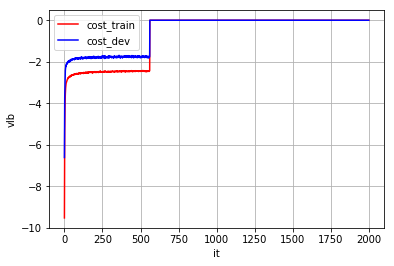

In [12]:
from __future__ import division
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss_cat import VAEAC_gauss_cat_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker

from src.LSAT_loader import get_my_LSAT, join_LSAT_targets

masker = top_masker(p=1)

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds, my_data_keys, input_dim_vec = \
    get_my_LSAT(save_dir='../data/')
x_train, x_test, input_dim_vec = join_LSAT_targets(x_train, x_test, y_train, y_test, input_dim_vec)
print('LSAT', x_train.shape, x_test.shape)
print(input_dim_vec)

dname = 'lsat'
print(dname)

trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_test, transform=None)

save_dir = '../saves/fc_preact_VAEAC_NEW_' + dname

width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]

batch_size = 128
nb_epochs = 2000
early_stop = 200
lr = 1e-4

cuda = torch.cuda.is_available()

net = VAEAC_gauss_cat_net(input_dim_vec, width, depth, latent_dim, pred_sig=False, lr=lr,
                          cuda=cuda, flatten=False)


vlb_train, vlb_dev = train_VAEAC(net, masker, save_dir, batch_size, nb_epochs, trainset, valset, cuda,
                     flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)



## Under LSAT

In [20]:
%matplotlib inline
from __future__ import division
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss_cat import VAEAC_gauss_cat_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker
import torch
from torchvision import datasets, transforms
from VAEAC.under_net import under_VAEAC
from VAE.train import train_VAE
from src.LSAT_loader import get_my_LSAT, join_LSAT_targets

masker = top_masker(p=1)

dname = 'lsat'
print(dname)

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds, my_data_keys, input_dim_vec = \
    get_my_LSAT(save_dir='../data/')
x_train, x_test, input_dim_vec = join_LSAT_targets(x_train, x_test, y_train, y_test, input_dim_vec)
print('LSAT', x_train.shape, x_test.shape)
print(input_dim_vec)


trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_test, transform=None)


width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]
lr = 1e-4

cuda = torch.cuda.is_available()

base_network_wraper = VAEAC_gauss_cat_net(input_dim_vec, width, depth, latent_dim, pred_sig=False, lr=lr,
                                          cuda=cuda, flatten=False)
base_network_wraper.load('../saves/fc_preact_VAEAC_NEW_' + dname + '_models/theta_best.dat')


base_network = base_network_wraper.model
width = 150
depth = 2
latent_dim = under_latent_dims2[names.index(dname)]

batch_size = 128
nb_epochs = 2000
early_stop = 200
lr = 1e-4

savedir = '../saves/fc_VAEAC_NEW_under2_' + dname

cuda = torch.cuda.is_available()

under_VAEAC_net = under_VAEAC(base_network, width, depth, latent_dim, lr, cuda=cuda)

vlb_train, vlb_dev = train_VAE(under_VAEAC_net, savedir,
                               batch_size, nb_epochs, trainset, valset, cuda=cuda,
                               flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)




lsat


('LSAT', (17432, 13), (4358, 13))
[1 1 8 2 1]

Net:
VAE_gauss_net
    Total params: 0.77M
Reading ../saves/fc_preact_VAEAC_NEW_lsat_models/theta_best.dat

  restoring epoch: 360, lr: 0.000100

Net:
VAE_gauss_net
    Total params: 0.05M

Network:

Train:
  init cost variables:
it 0/2000, vlb -11.141492,    time: 1.217436 seconds

    vlb -8.133738 (-inf)

Writting ../saves/fc_VAEAC_NEW_under2_lsat_models/theta_best.dat

it 1/2000, vlb -7.757805,    time: 1.229826 seconds

    vlb -7.439038 (-8.133738)

Writting ../saves/fc_VAEAC_NEW_under2_lsat_models/theta_best.dat

it 2/2000, vlb -7.433502,    time: 1.278947 seconds

    vlb -7.131979 (-7.439038)

Writting ../saves/fc_VAEAC_NEW_under2_lsat_models/theta_best.dat

it 3/2000, vlb -7.170453,    time: 1.272851 seconds

    vlb -7.028281 (-7.131979)

Writting ../saves/fc_VAEAC_NEW_under2_lsat_models/theta_best.dat

it 4/2000, vlb -7.023021,    time: 1.115577 seconds

    vlb -6.810313 (-7.028281)

Writting ../saves/fc_VAEAC_NEW_under

    vlb -6.017185 (-5.940914)

it 63/2000, vlb -6.131595,    time: 1.143195 seconds

    vlb -6.066992 (-5.940914)

it 64/2000, vlb -6.144071,    time: 1.181468 seconds

    vlb -5.962399 (-5.940914)

it 65/2000, vlb -6.134633,    time: 1.328738 seconds

    vlb -5.991563 (-5.940914)

it 66/2000, vlb -6.141936,    time: 1.226840 seconds

    vlb -5.944589 (-5.940914)

it 67/2000, vlb -6.144840,    time: 1.212433 seconds

    vlb -6.024990 (-5.940914)

it 68/2000, vlb -6.177265,    time: 1.226992 seconds

    vlb -5.935369 (-5.940914)

Writting ../saves/fc_VAEAC_NEW_under2_lsat_models/theta_best.dat

it 69/2000, vlb -6.143254,    time: 1.176362 seconds

    vlb -5.971904 (-5.935369)

it 70/2000, vlb -6.121957,    time: 1.141961 seconds

    vlb -5.969547 (-5.935369)

it 71/2000, vlb -6.163458,    time: 1.200965 seconds

    vlb -6.024458 (-5.935369)

it 72/2000, vlb -6.132035,    time: 1.214057 seconds

    vlb -6.001120 (-5.935369)

it 73/2000, vlb -6.129003,    time: 1.109877 seconds


it 139/2000, vlb -6.108395,    time: 1.200370 seconds

    vlb -6.013163 (-5.875292)

it 140/2000, vlb -6.084309,    time: 1.301005 seconds

    vlb -5.973923 (-5.875292)

it 141/2000, vlb -6.065326,    time: 1.223679 seconds

    vlb -5.945560 (-5.875292)

it 142/2000, vlb -6.099137,    time: 1.150782 seconds

    vlb -5.972135 (-5.875292)

it 143/2000, vlb -6.089174,    time: 1.136197 seconds

    vlb -5.951056 (-5.875292)

it 144/2000, vlb -6.120234,    time: 1.209202 seconds

    vlb -5.971612 (-5.875292)

it 145/2000, vlb -6.070786,    time: 1.142112 seconds

    vlb -5.927466 (-5.875292)

it 146/2000, vlb -6.084008,    time: 1.220698 seconds

    vlb -5.955035 (-5.875292)

it 147/2000, vlb -6.077483,    time: 1.177010 seconds

    vlb -5.934245 (-5.875292)

it 148/2000, vlb -6.063188,    time: 1.172024 seconds

    vlb -5.988609 (-5.875292)

it 149/2000, vlb -6.096043,    time: 1.162798 seconds

    vlb -6.022538 (-5.875292)

it 150/2000, vlb -6.114926,    time: 1.175089 seconds


    vlb -5.867623 (-5.856267)

it 217/2000, vlb -6.061675,    time: 1.179907 seconds

    vlb -5.973475 (-5.856267)

it 218/2000, vlb -6.081878,    time: 1.238500 seconds

    vlb -5.938619 (-5.856267)

it 219/2000, vlb -6.092043,    time: 1.182764 seconds

    vlb -5.918841 (-5.856267)

it 220/2000, vlb -6.077601,    time: 1.270334 seconds

    vlb -5.892380 (-5.856267)

it 221/2000, vlb -6.075677,    time: 1.186730 seconds

    vlb -5.981877 (-5.856267)

it 222/2000, vlb -6.088927,    time: 1.212126 seconds

    vlb -5.954225 (-5.856267)

it 223/2000, vlb -6.000706,    time: 1.239479 seconds

    vlb -5.887963 (-5.856267)

it 224/2000, vlb -6.088529,    time: 1.207418 seconds

    vlb -5.972106 (-5.856267)

it 225/2000, vlb -6.074935,    time: 1.195767 seconds

    vlb -5.899092 (-5.856267)

it 226/2000, vlb -6.042964,    time: 1.171302 seconds

    vlb -5.951707 (-5.856267)

it 227/2000, vlb -6.063814,    time: 1.238548 seconds

    vlb -5.905691 (-5.856267)

it 228/2000, vlb -6.024

it 292/2000, vlb -6.048105,    time: 1.270591 seconds

    vlb -5.932557 (-5.815428)

it 293/2000, vlb -6.042967,    time: 1.164539 seconds

    vlb -5.863800 (-5.815428)

it 294/2000, vlb -6.070847,    time: 1.117736 seconds

    vlb -5.890418 (-5.815428)

it 295/2000, vlb -6.030883,    time: 1.097124 seconds

    vlb -5.906456 (-5.815428)

it 296/2000, vlb -6.021697,    time: 1.092801 seconds

    vlb -5.910039 (-5.815428)

it 297/2000, vlb -6.039035,    time: 1.241485 seconds

    vlb -5.837037 (-5.815428)

it 298/2000, vlb -6.061515,    time: 1.278698 seconds

    vlb -5.836615 (-5.815428)

it 299/2000, vlb -6.038691,    time: 1.266837 seconds

    vlb -5.937933 (-5.815428)

it 300/2000, vlb -6.040059,    time: 1.177237 seconds

    vlb -5.917071 (-5.815428)

it 301/2000, vlb -6.031270,    time: 1.176351 seconds

    vlb -5.831448 (-5.815428)

it 302/2000, vlb -6.039744,    time: 1.226058 seconds

    vlb -5.884865 (-5.815428)

it 303/2000, vlb -6.065607,    time: 1.243412 seconds


it 371/2000, vlb -6.031150,    time: 1.249393 seconds

    vlb -5.843182 (-5.815428)

it 372/2000, vlb -6.034837,    time: 1.257195 seconds

    vlb -5.885003 (-5.815428)

it 373/2000, vlb -6.005782,    time: 1.169732 seconds

    vlb -5.847564 (-5.815428)

it 374/2000, vlb -5.997034,    time: 1.228817 seconds

    vlb -5.891217 (-5.815428)

it 375/2000, vlb -5.978242,    time: 1.213444 seconds

    vlb -5.906780 (-5.815428)

it 376/2000, vlb -6.027442,    time: 1.141095 seconds

    vlb -5.831708 (-5.815428)

it 377/2000, vlb -6.018616,    time: 1.190144 seconds

    vlb -5.894806 (-5.815428)

it 378/2000, vlb -6.016633,    time: 1.237003 seconds

    vlb -5.974944 (-5.815428)

it 379/2000, vlb -6.032409,    time: 1.226033 seconds

    vlb -5.872854 (-5.815428)

it 380/2000, vlb -6.028120,    time: 1.232909 seconds

    vlb -5.881204 (-5.815428)

it 381/2000, vlb -6.046378,    time: 1.251654 seconds

    vlb -5.869925 (-5.815428)

it 382/2000, vlb -6.021445,    time: 1.294818 seconds


    vlb -5.868536 (-5.800748)

it 449/2000, vlb -5.976316,    time: 1.259486 seconds

    vlb -5.834065 (-5.800748)

it 450/2000, vlb -6.022799,    time: 1.194463 seconds

    vlb -5.859009 (-5.800748)

it 451/2000, vlb -6.026559,    time: 1.160927 seconds

    vlb -5.828737 (-5.800748)

it 452/2000, vlb -5.995972,    time: 1.197321 seconds

    vlb -5.936704 (-5.800748)

it 453/2000, vlb -6.034772,    time: 1.156054 seconds

    vlb -5.837156 (-5.800748)

it 454/2000, vlb -6.022381,    time: 1.182988 seconds

    vlb -5.870284 (-5.800748)

it 455/2000, vlb -5.980373,    time: 1.254350 seconds

    vlb -5.879480 (-5.800748)

it 456/2000, vlb -5.994916,    time: 1.262449 seconds

    vlb -5.848599 (-5.800748)

it 457/2000, vlb -5.986735,    time: 1.316241 seconds

    vlb -5.897456 (-5.800748)

it 458/2000, vlb -5.985712,    time: 1.241165 seconds

    vlb -5.823150 (-5.800748)

it 459/2000, vlb -5.983649,    time: 1.061679 seconds

    vlb -5.907444 (-5.800748)

it 460/2000, vlb -6.021

it 527/2000, vlb -6.005677,    time: 1.246235 seconds

    vlb -5.845402 (-5.769802)

it 528/2000, vlb -5.979577,    time: 1.271288 seconds

    vlb -5.889963 (-5.769802)

it 529/2000, vlb -5.994981,    time: 1.244472 seconds

    vlb -5.877425 (-5.769802)

it 530/2000, vlb -6.002576,    time: 1.305160 seconds

    vlb -5.910545 (-5.769802)

it 531/2000, vlb -5.967776,    time: 1.129931 seconds

    vlb -5.885833 (-5.769802)

it 532/2000, vlb -5.991372,    time: 1.171427 seconds

    vlb -5.891834 (-5.769802)

it 533/2000, vlb -6.022051,    time: 1.196976 seconds

    vlb -5.867315 (-5.769802)

it 534/2000, vlb -6.000479,    time: 1.169746 seconds

    vlb -5.788938 (-5.769802)

it 535/2000, vlb -6.016988,    time: 1.087594 seconds

    vlb -5.888566 (-5.769802)

it 536/2000, vlb -6.018872,    time: 1.180730 seconds

    vlb -5.826301 (-5.769802)

it 537/2000, vlb -6.010649,    time: 1.172303 seconds

    vlb -5.843009 (-5.769802)

it 538/2000, vlb -6.000054,    time: 1.211798 seconds


    vlb -5.820668 (-5.743818)

it 606/2000, vlb -5.967926,    time: 1.318356 seconds

    vlb -5.859857 (-5.743818)

it 607/2000, vlb -5.987376,    time: 1.233567 seconds

    vlb -5.806416 (-5.743818)

it 608/2000, vlb -5.977986,    time: 1.180362 seconds

    vlb -5.879882 (-5.743818)

it 609/2000, vlb -5.965524,    time: 1.190895 seconds

    vlb -5.858966 (-5.743818)

it 610/2000, vlb -5.971194,    time: 1.195417 seconds

    vlb -5.850816 (-5.743818)

it 611/2000, vlb -5.982612,    time: 1.132370 seconds

    vlb -5.868097 (-5.743818)

it 612/2000, vlb -6.001623,    time: 1.290146 seconds

    vlb -5.904826 (-5.743818)

it 613/2000, vlb -5.955928,    time: 1.256052 seconds

    vlb -5.827127 (-5.743818)

it 614/2000, vlb -5.970932,    time: 1.152934 seconds

    vlb -5.869653 (-5.743818)

it 615/2000, vlb -5.961426,    time: 1.193445 seconds

    vlb -5.863986 (-5.743818)

it 616/2000, vlb -5.993011,    time: 1.219427 seconds

    vlb -5.833833 (-5.743818)

it 617/2000, vlb -5.989

    vlb -5.871842 (-5.743818)

it 685/2000, vlb -5.965314,    time: 1.179336 seconds

    vlb -5.851714 (-5.743818)

it 686/2000, vlb -5.957798,    time: 1.123537 seconds

    vlb -5.831631 (-5.743818)

it 687/2000, vlb -5.978838,    time: 1.101143 seconds

    vlb -5.896437 (-5.743818)

it 688/2000, vlb -5.997311,    time: 1.117346 seconds

    vlb -5.816863 (-5.743818)

it 689/2000, vlb -5.985855,    time: 1.220144 seconds

    vlb -5.839635 (-5.743818)

it 690/2000, vlb -5.963472,    time: 1.224785 seconds

    vlb -5.861851 (-5.743818)

it 691/2000, vlb -5.965412,    time: 1.151118 seconds

    vlb -5.904524 (-5.743818)

it 692/2000, vlb -5.994521,    time: 1.187604 seconds

    vlb -5.867476 (-5.743818)

it 693/2000, vlb -5.999253,    time: 1.171242 seconds

    vlb -5.839406 (-5.743818)

it 694/2000, vlb -5.969223,    time: 1.177571 seconds

    vlb -5.882652 (-5.743818)

it 695/2000, vlb -5.987178,    time: 1.214129 seconds

    vlb -5.870399 (-5.743818)

it 696/2000, vlb -5.997

    vlb -5.835826 (-5.743818)

it 764/2000, vlb -5.974467,    time: 1.195101 seconds

    vlb -5.906478 (-5.743818)

it 765/2000, vlb -5.991664,    time: 1.179754 seconds

    vlb -5.829789 (-5.743818)

it 766/2000, vlb -5.964115,    time: 1.208269 seconds

    vlb -5.835632 (-5.743818)

it 767/2000, vlb -5.963708,    time: 1.190168 seconds

    vlb -5.827495 (-5.743818)

it 768/2000, vlb -5.961563,    time: 1.163960 seconds

    vlb -5.777627 (-5.743818)

it 769/2000, vlb -5.962413,    time: 1.180523 seconds

    vlb -5.901312 (-5.743818)

it 770/2000, vlb -5.947556,    time: 1.198816 seconds

    vlb -5.810885 (-5.743818)

it 771/2000, vlb -5.986556,    time: 1.128081 seconds

    vlb -5.832906 (-5.743818)

it 772/2000, vlb -5.977285,    time: 1.163613 seconds

    vlb -5.845728 (-5.743818)

it 773/2000, vlb -5.975579,    time: 1.202670 seconds

    vlb -5.861380 (-5.743818)

it 774/2000, vlb -6.005505,    time: 1.250202 seconds

    vlb -5.826642 (-5.743818)

it 775/2000, vlb -5.995

/homes/ja666/Documents/mphil_project/mphil_src/VAE/train.py:170: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/homes/ja666/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/homes/ja666/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/homes/ja666/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/homes/ja666/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/homes/ja666/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499, in st

# Train all datasets without targets


## Wine rms

In [1]:
from src.UCI_loader import load_UCI
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss import VAEAC_gauss_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker

masker = top_masker(p=1)


dname = 'wine'
print(dname)

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds = \
load_UCI(dset_name=dname, splits=10, seed=42, separate_targets=True, save_dir='../data/')

trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_train, transform=None)

save_dir = '../saves/fc_preact_VAEAC_noclass_NEW_' + dname

input_dim = x_train.shape[1]
width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]

batch_size = 128
nb_epochs = 2500
lr = 1e-4
early_stop = 200

cuda = torch.cuda.is_available()

net = VAEAC_gauss_net(input_dim, width, depth, latent_dim, pred_sig=False, lr=lr, cuda=cuda)

vlb_train, vlb_dev = train_VAEAC(net, masker, save_dir, batch_size, nb_epochs, trainset, valset, cuda,
            flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)






ImportError: No module named src.UCI_loader

## Credit

(27000, 23)
(3000, 23)
default_credit

Net:
VAE_gauss_net
    Total params: 0.80M

Network:

Train:
  init cost variables:
it 0/2000, vlb -33.824343,    time: 3.276169 seconds

    vlb -18.021236 (-inf)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 1/2000, vlb -20.528751,    time: 3.324881 seconds

    vlb -13.670283 (-18.021236)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 2/2000, vlb -16.763326,    time: 3.358443 seconds

    vlb -11.592580 (-13.670283)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 3/2000, vlb -14.684825,    time: 3.325272 seconds

    vlb -10.457297 (-11.592580)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 4/2000, vlb -13.357833,    time: 3.361017 seconds

    vlb -9.428716 (-10.457297)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 5/2000, vlb -12.311674,   

    vlb -5.080039 (-5.094014)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 47/2000, vlb -7.143224,    time: 3.306459 seconds

    vlb -5.094551 (-5.080039)

it 48/2000, vlb -7.136046,    time: 3.307016 seconds

    vlb -5.045870 (-5.080039)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 49/2000, vlb -7.079873,    time: 3.325862 seconds

    vlb -5.115153 (-5.045870)

it 50/2000, vlb -7.059123,    time: 3.315898 seconds

    vlb -5.030009 (-5.045870)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 51/2000, vlb -7.034834,    time: 3.511859 seconds

    vlb -5.088136 (-5.030009)

it 52/2000, vlb -7.027972,    time: 3.349573 seconds

    vlb -5.069090 (-5.030009)

it 53/2000, vlb -6.987602,    time: 3.322751 seconds

    vlb -5.089508 (-5.030009)

it 54/2000, vlb -7.014970,    time: 3.347220 seconds

    vlb -5.040315 (-5.030009)

it 55/2000, vlb -6.997168,    time: 3

    vlb -4.910120 (-4.775500)

it 115/2000, vlb -6.526268,    time: 3.300264 seconds

    vlb -4.782397 (-4.775500)

it 116/2000, vlb -6.491451,    time: 3.337242 seconds

    vlb -4.908677 (-4.775500)

it 117/2000, vlb -6.512114,    time: 3.312136 seconds

    vlb -4.827204 (-4.775500)

it 118/2000, vlb -6.486205,    time: 3.300416 seconds

    vlb -4.850006 (-4.775500)

it 119/2000, vlb -6.490977,    time: 3.315845 seconds

    vlb -4.799712 (-4.775500)

it 120/2000, vlb -6.505399,    time: 3.289357 seconds

    vlb -4.864302 (-4.775500)

it 121/2000, vlb -6.516965,    time: 3.303682 seconds

    vlb -4.759588 (-4.775500)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 122/2000, vlb -6.507252,    time: 3.321931 seconds

    vlb -4.778149 (-4.759588)

it 123/2000, vlb -6.503719,    time: 3.258882 seconds

    vlb -4.807192 (-4.759588)

it 124/2000, vlb -6.520500,    time: 3.312840 seconds

    vlb -4.771613 (-4.759588)

it 125/2000, vlb -6.48502

    vlb -4.686547 (-4.623109)

it 187/2000, vlb -6.317307,    time: 3.337024 seconds

    vlb -4.704467 (-4.623109)

it 188/2000, vlb -6.323982,    time: 3.295086 seconds

    vlb -4.822216 (-4.623109)

it 189/2000, vlb -6.298024,    time: 3.323658 seconds

    vlb -4.783435 (-4.623109)

it 190/2000, vlb -6.290897,    time: 3.313449 seconds

    vlb -4.774303 (-4.623109)

it 191/2000, vlb -6.278118,    time: 3.326394 seconds

    vlb -4.738436 (-4.623109)

it 192/2000, vlb -6.301420,    time: 3.366121 seconds

    vlb -4.659920 (-4.623109)

it 193/2000, vlb -6.306581,    time: 3.333383 seconds

    vlb -4.732928 (-4.623109)

it 194/2000, vlb -6.266688,    time: 3.317483 seconds

    vlb -4.681075 (-4.623109)

it 195/2000, vlb -6.286899,    time: 3.292885 seconds

    vlb -4.565783 (-4.623109)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 196/2000, vlb -6.294512,    time: 3.340956 seconds

    vlb -4.799241 (-4.565783)

it 197/2000, vlb -6.27916

    vlb -4.649765 (-4.565783)

it 265/2000, vlb -6.166929,    time: 3.285873 seconds

    vlb -4.744423 (-4.565783)

it 266/2000, vlb -6.206978,    time: 3.271203 seconds

    vlb -4.651322 (-4.565783)

it 267/2000, vlb -6.185496,    time: 3.258746 seconds

    vlb -4.775255 (-4.565783)

it 268/2000, vlb -6.153780,    time: 3.298542 seconds

    vlb -4.729623 (-4.565783)

it 269/2000, vlb -6.136141,    time: 3.308606 seconds

    vlb -4.715525 (-4.565783)

it 270/2000, vlb -6.133982,    time: 3.291787 seconds

    vlb -4.720320 (-4.565783)

it 271/2000, vlb -6.109468,    time: 3.345455 seconds

    vlb -4.648060 (-4.565783)

it 272/2000, vlb -6.143568,    time: 3.289335 seconds

    vlb -4.605811 (-4.565783)

it 273/2000, vlb -6.162621,    time: 3.319189 seconds

    vlb -4.611636 (-4.565783)

it 274/2000, vlb -6.144267,    time: 3.283755 seconds

    vlb -4.751077 (-4.565783)

it 275/2000, vlb -6.137594,    time: 3.328439 seconds

    vlb -4.581654 (-4.565783)

it 276/2000, vlb -6.158

    vlb -4.617673 (-4.516739)

it 342/2000, vlb -6.055817,    time: 3.314868 seconds

    vlb -4.643015 (-4.516739)

it 343/2000, vlb -6.058154,    time: 3.317699 seconds

    vlb -4.559691 (-4.516739)

it 344/2000, vlb -6.059494,    time: 3.272380 seconds

    vlb -4.574139 (-4.516739)

it 345/2000, vlb -6.090907,    time: 3.260321 seconds

    vlb -4.611684 (-4.516739)

it 346/2000, vlb -6.098680,    time: 3.289324 seconds

    vlb -4.573345 (-4.516739)

it 347/2000, vlb -6.104541,    time: 3.276837 seconds

    vlb -4.513876 (-4.516739)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 348/2000, vlb -6.074107,    time: 3.344961 seconds

    vlb -4.634541 (-4.513876)

it 349/2000, vlb -6.070695,    time: 3.303113 seconds

    vlb -4.601343 (-4.513876)

it 350/2000, vlb -6.054492,    time: 3.317452 seconds

    vlb -4.576639 (-4.513876)

it 351/2000, vlb -6.089292,    time: 3.303877 seconds

    vlb -4.605606 (-4.513876)

it 352/2000, vlb -6.05336

it 418/2000, vlb -5.987490,    time: 3.291892 seconds

    vlb -4.678256 (-4.459480)

it 419/2000, vlb -6.043847,    time: 3.311220 seconds

    vlb -4.581518 (-4.459480)

it 420/2000, vlb -6.076431,    time: 3.271447 seconds

    vlb -4.481476 (-4.459480)

it 421/2000, vlb -6.052403,    time: 3.289147 seconds

    vlb -4.534687 (-4.459480)

it 422/2000, vlb -6.027282,    time: 3.297401 seconds

    vlb -4.538252 (-4.459480)

it 423/2000, vlb -5.980179,    time: 3.313967 seconds

    vlb -4.534458 (-4.459480)

it 424/2000, vlb -6.025583,    time: 3.319838 seconds

    vlb -4.552270 (-4.459480)

it 425/2000, vlb -5.959593,    time: 3.270333 seconds

    vlb -4.508654 (-4.459480)

it 426/2000, vlb -6.003933,    time: 3.279471 seconds

    vlb -4.593301 (-4.459480)

it 427/2000, vlb -6.021457,    time: 3.292305 seconds

    vlb -4.517684 (-4.459480)

it 428/2000, vlb -5.975701,    time: 3.307481 seconds

    vlb -4.584244 (-4.459480)

it 429/2000, vlb -5.960585,    time: 3.320478 seconds


it 496/2000, vlb -5.974373,    time: 3.271587 seconds

    vlb -4.599339 (-4.446996)

it 497/2000, vlb -5.945811,    time: 3.307047 seconds

    vlb -4.559874 (-4.446996)

it 498/2000, vlb -5.930810,    time: 3.313486 seconds

    vlb -4.529760 (-4.446996)

it 499/2000, vlb -6.000791,    time: 3.313665 seconds

    vlb -4.437927 (-4.446996)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 500/2000, vlb -5.937646,    time: 3.338249 seconds

    vlb -4.452429 (-4.437927)

it 501/2000, vlb -5.950779,    time: 3.297789 seconds

    vlb -4.504075 (-4.437927)

it 502/2000, vlb -5.978625,    time: 3.284354 seconds

    vlb -4.545468 (-4.437927)

it 503/2000, vlb -5.940927,    time: 3.319517 seconds

    vlb -4.545275 (-4.437927)

it 504/2000, vlb -5.982245,    time: 3.298418 seconds

    vlb -4.508150 (-4.437927)

it 505/2000, vlb -5.929273,    time: 3.381467 seconds

    vlb -4.550242 (-4.437927)

it 506/2000, vlb -5.958680,    time: 3.340284 seconds

 

it 574/2000, vlb -5.931903,    time: 3.274934 seconds

    vlb -4.484354 (-4.437927)

it 575/2000, vlb -5.896758,    time: 3.302753 seconds

    vlb -4.603494 (-4.437927)

it 576/2000, vlb -5.935261,    time: 3.296087 seconds

    vlb -4.468381 (-4.437927)

it 577/2000, vlb -5.898192,    time: 3.351574 seconds

    vlb -4.568001 (-4.437927)

it 578/2000, vlb -5.888649,    time: 3.275291 seconds

    vlb -4.578094 (-4.437927)

it 579/2000, vlb -5.958279,    time: 3.323626 seconds

    vlb -4.550259 (-4.437927)

it 580/2000, vlb -5.915354,    time: 3.306663 seconds

    vlb -4.559291 (-4.437927)

it 581/2000, vlb -5.903873,    time: 3.278708 seconds

    vlb -4.570192 (-4.437927)

it 582/2000, vlb -5.913566,    time: 3.288484 seconds

    vlb -4.587554 (-4.437927)

it 583/2000, vlb -5.897714,    time: 3.325732 seconds

    vlb -4.469394 (-4.437927)

it 584/2000, vlb -5.900529,    time: 3.276957 seconds

    vlb -4.483599 (-4.437927)

it 585/2000, vlb -5.898856,    time: 3.272049 seconds


it 652/2000, vlb -5.917991,    time: 3.272837 seconds

    vlb -4.582710 (-4.370866)

it 653/2000, vlb -5.890817,    time: 3.319783 seconds

    vlb -4.555828 (-4.370866)

it 654/2000, vlb -5.898041,    time: 3.299795 seconds

    vlb -4.497094 (-4.370866)

it 655/2000, vlb -5.884031,    time: 3.285803 seconds

    vlb -4.453272 (-4.370866)

it 656/2000, vlb -5.882643,    time: 3.279197 seconds

    vlb -4.567748 (-4.370866)

it 657/2000, vlb -5.878953,    time: 3.321605 seconds

    vlb -4.518915 (-4.370866)

it 658/2000, vlb -5.869329,    time: 3.293343 seconds

    vlb -4.412092 (-4.370866)

it 659/2000, vlb -5.854393,    time: 3.343987 seconds

    vlb -4.541535 (-4.370866)

it 660/2000, vlb -5.883072,    time: 3.348239 seconds

    vlb -4.543487 (-4.370866)

it 661/2000, vlb -5.860643,    time: 3.299604 seconds

    vlb -4.429280 (-4.370866)

it 662/2000, vlb -5.899467,    time: 3.306924 seconds

    vlb -4.408702 (-4.370866)

it 663/2000, vlb -5.866468,    time: 3.324028 seconds


it 731/2000, vlb -5.845684,    time: 3.307622 seconds

    vlb -4.493226 (-4.370866)

it 732/2000, vlb -5.836551,    time: 3.357912 seconds

    vlb -4.527928 (-4.370866)

it 733/2000, vlb -5.863393,    time: 3.335486 seconds

    vlb -4.449547 (-4.370866)

it 734/2000, vlb -5.819488,    time: 3.344679 seconds

    vlb -4.506148 (-4.370866)

it 735/2000, vlb -5.851929,    time: 3.323368 seconds

    vlb -4.513732 (-4.370866)

it 736/2000, vlb -5.834238,    time: 3.272141 seconds

    vlb -4.484655 (-4.370866)

it 737/2000, vlb -5.838406,    time: 3.280789 seconds

    vlb -4.487046 (-4.370866)

it 738/2000, vlb -5.814986,    time: 3.323796 seconds

    vlb -4.425376 (-4.370866)

it 739/2000, vlb -5.830654,    time: 3.302027 seconds

    vlb -4.559361 (-4.370866)

it 740/2000, vlb -5.857853,    time: 3.281288 seconds

    vlb -4.490592 (-4.370866)

it 741/2000, vlb -5.849631,    time: 3.314768 seconds

    vlb -4.518716 (-4.370866)

it 742/2000, vlb -5.781213,    time: 3.316773 seconds


it 810/2000, vlb -5.855011,    time: 3.342545 seconds

    vlb -4.480104 (-4.370866)

it 811/2000, vlb -5.805192,    time: 3.297888 seconds

    vlb -4.489958 (-4.370866)

it 812/2000, vlb -5.820160,    time: 3.304980 seconds

    vlb -4.369320 (-4.370866)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 813/2000, vlb -5.820902,    time: 3.310024 seconds

    vlb -4.475833 (-4.369320)

it 814/2000, vlb -5.838012,    time: 3.320051 seconds

    vlb -4.510314 (-4.369320)

it 815/2000, vlb -5.800839,    time: 3.324950 seconds

    vlb -4.449947 (-4.369320)

it 816/2000, vlb -5.818082,    time: 3.307373 seconds

    vlb -4.449765 (-4.369320)

it 817/2000, vlb -5.824716,    time: 3.329509 seconds

    vlb -4.487810 (-4.369320)

it 818/2000, vlb -5.878976,    time: 3.330190 seconds

    vlb -4.551208 (-4.369320)

it 819/2000, vlb -5.858135,    time: 3.281777 seconds

    vlb -4.496526 (-4.369320)

it 820/2000, vlb -5.807631,    time: 3.300984 seconds

 

it 888/2000, vlb -5.784755,    time: 3.301202 seconds

    vlb -4.483605 (-4.369320)

it 889/2000, vlb -5.791663,    time: 3.330300 seconds

    vlb -4.414032 (-4.369320)

it 890/2000, vlb -5.778021,    time: 3.340250 seconds

    vlb -4.432639 (-4.369320)

it 891/2000, vlb -5.775528,    time: 3.262670 seconds

    vlb -4.530180 (-4.369320)

it 892/2000, vlb -5.824210,    time: 3.304600 seconds

    vlb -4.440159 (-4.369320)

it 893/2000, vlb -5.822523,    time: 3.320175 seconds

    vlb -4.438051 (-4.369320)

it 894/2000, vlb -5.841009,    time: 3.273243 seconds

    vlb -4.412454 (-4.369320)

it 895/2000, vlb -5.773005,    time: 3.374890 seconds

    vlb -4.446502 (-4.369320)

it 896/2000, vlb -5.789328,    time: 3.499297 seconds

    vlb -4.395373 (-4.369320)

it 897/2000, vlb -5.752982,    time: 3.291346 seconds

    vlb -4.574212 (-4.369320)

it 898/2000, vlb -5.791811,    time: 3.308980 seconds

    vlb -4.485946 (-4.369320)

it 899/2000, vlb -5.765963,    time: 3.305050 seconds


it 967/2000, vlb -5.733355,    time: 3.275390 seconds

    vlb -4.433529 (-4.369320)

it 968/2000, vlb -5.713856,    time: 3.312126 seconds

    vlb -4.407361 (-4.369320)

it 969/2000, vlb -5.758027,    time: 3.289061 seconds

    vlb -4.393990 (-4.369320)

it 970/2000, vlb -5.752104,    time: 3.297037 seconds

    vlb -4.399409 (-4.369320)

it 971/2000, vlb -5.811593,    time: 3.329795 seconds

    vlb -4.435107 (-4.369320)

it 972/2000, vlb -5.772622,    time: 3.280205 seconds

    vlb -4.391616 (-4.369320)

it 973/2000, vlb -5.815979,    time: 3.286226 seconds

    vlb -4.472727 (-4.369320)

it 974/2000, vlb -5.754804,    time: 3.296294 seconds

    vlb -4.410532 (-4.369320)

it 975/2000, vlb -5.758421,    time: 3.320204 seconds

    vlb -4.428706 (-4.369320)

it 976/2000, vlb -5.759920,    time: 3.270452 seconds

    vlb -4.479204 (-4.369320)

it 977/2000, vlb -5.770070,    time: 3.310695 seconds

    vlb -4.486337 (-4.369320)

it 978/2000, vlb -5.759281,    time: 3.259851 seconds


    vlb -4.401142 (-4.367960)

it 1045/2000, vlb -5.758214,    time: 3.334495 seconds

    vlb -4.433961 (-4.367960)

it 1046/2000, vlb -5.740857,    time: 3.323864 seconds

    vlb -4.386916 (-4.367960)

it 1047/2000, vlb -5.758986,    time: 3.279710 seconds

    vlb -4.495156 (-4.367960)

it 1048/2000, vlb -5.727122,    time: 3.334458 seconds

    vlb -4.513237 (-4.367960)

it 1049/2000, vlb -5.726363,    time: 3.307310 seconds

    vlb -4.488016 (-4.367960)

it 1050/2000, vlb -5.757084,    time: 3.294151 seconds

    vlb -4.472815 (-4.367960)

it 1051/2000, vlb -5.741866,    time: 3.286724 seconds

    vlb -4.505981 (-4.367960)

it 1052/2000, vlb -5.749087,    time: 3.326157 seconds

    vlb -4.502939 (-4.367960)

it 1053/2000, vlb -5.762000,    time: 3.300521 seconds

    vlb -4.427194 (-4.367960)

it 1054/2000, vlb -5.747693,    time: 3.324008 seconds

    vlb -4.533677 (-4.367960)

it 1055/2000, vlb -5.705768,    time: 3.297735 seconds

    vlb -4.495597 (-4.367960)

it 1056/2000

it 1122/2000, vlb -5.719352,    time: 3.300222 seconds

    vlb -4.411027 (-4.352859)

it 1123/2000, vlb -5.732780,    time: 3.299180 seconds

    vlb -4.575497 (-4.352859)

it 1124/2000, vlb -5.729412,    time: 3.326713 seconds

    vlb -4.442105 (-4.352859)

it 1125/2000, vlb -5.706126,    time: 3.272633 seconds

    vlb -4.461622 (-4.352859)

it 1126/2000, vlb -5.701212,    time: 3.328926 seconds

    vlb -4.467307 (-4.352859)

it 1127/2000, vlb -5.730405,    time: 3.347661 seconds

    vlb -4.449222 (-4.352859)

it 1128/2000, vlb -5.723186,    time: 3.330633 seconds

    vlb -4.336883 (-4.352859)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_default_credit_models/theta_best.dat

it 1129/2000, vlb -5.763993,    time: 3.362895 seconds

    vlb -4.436698 (-4.336883)

it 1130/2000, vlb -5.726167,    time: 3.285407 seconds

    vlb -4.425887 (-4.336883)

it 1131/2000, vlb -5.720166,    time: 3.316577 seconds

    vlb -4.453296 (-4.336883)

it 1132/2000, vlb -5.727710,    time: 3.295572

    vlb -4.480507 (-4.336883)

it 1200/2000, vlb -5.715893,    time: 3.282553 seconds

    vlb -4.441508 (-4.336883)

it 1201/2000, vlb -5.724436,    time: 3.295414 seconds

    vlb -4.492961 (-4.336883)

it 1202/2000, vlb -5.701409,    time: 3.288110 seconds

    vlb -4.502525 (-4.336883)

it 1203/2000, vlb -5.702263,    time: 3.293588 seconds

    vlb -4.530638 (-4.336883)

it 1204/2000, vlb -5.721504,    time: 3.284712 seconds

    vlb -4.432415 (-4.336883)

it 1205/2000, vlb -5.738185,    time: 3.306553 seconds

    vlb -4.425108 (-4.336883)

it 1206/2000, vlb -5.722765,    time: 3.326495 seconds

    vlb -4.399565 (-4.336883)

it 1207/2000, vlb -5.696590,    time: 3.297212 seconds

    vlb -4.396208 (-4.336883)

it 1208/2000, vlb -5.721637,    time: 3.315113 seconds

    vlb -4.490873 (-4.336883)

it 1209/2000, vlb -5.686918,    time: 3.295712 seconds

    vlb -4.446101 (-4.336883)

it 1210/2000, vlb -5.697328,    time: 3.292187 seconds

    vlb -4.450653 (-4.336883)

it 1211/2000

it 1278/2000, vlb -5.701612,    time: 3.318770 seconds

    vlb -4.377587 (-4.336883)

it 1279/2000, vlb -5.697428,    time: 3.286142 seconds

    vlb -4.491295 (-4.336883)

it 1280/2000, vlb -5.727510,    time: 3.261033 seconds

    vlb -4.389508 (-4.336883)

it 1281/2000, vlb -5.699739,    time: 3.275131 seconds

    vlb -4.460541 (-4.336883)

it 1282/2000, vlb -5.716003,    time: 3.293606 seconds

    vlb -4.428581 (-4.336883)

it 1283/2000, vlb -5.707942,    time: 3.291600 seconds

    vlb -4.502891 (-4.336883)

it 1284/2000, vlb -5.675899,    time: 3.316277 seconds

    vlb -4.497538 (-4.336883)

it 1285/2000, vlb -5.699487,    time: 3.308919 seconds

    vlb -4.476070 (-4.336883)

it 1286/2000, vlb -5.720327,    time: 3.311114 seconds

    vlb -4.477581 (-4.336883)

it 1287/2000, vlb -5.715321,    time: 3.338545 seconds

    vlb -4.494985 (-4.336883)

it 1288/2000, vlb -5.692817,    time: 3.339128 seconds

    vlb -4.479132 (-4.336883)

it 1289/2000, vlb -5.670002,    time: 3.327

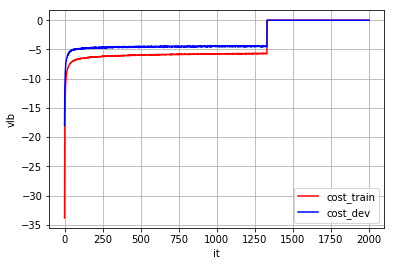

In [19]:
from __future__ import division
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss_cat import VAEAC_gauss_cat_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker

from src.UCI_loader import load_UCI, unnormalise_cat_vars
import numpy as np

masker = top_masker(p=1)

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds = \
load_UCI(dset_name='default_credit', splits=10, seed=42, separate_targets=True, save_dir='../data/')
input_dim_vec = [1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,1 ,1]


x_train = unnormalise_cat_vars(x_train, x_means, x_stds, input_dim_vec)
x_test = unnormalise_cat_vars(x_test, x_means, x_stds, input_dim_vec)
# target unnormalisation
y_train = unnormalise_cat_vars(y_train, y_means, y_stds, [2])
y_test = unnormalise_cat_vars(y_test, y_means, y_stds, [2])

trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_test, transform=None)

print(x_train.shape)
print(x_test.shape)

dname = 'default_credit'
print(dname)

trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_test, transform=None)

save_dir = '../saves/fc_preact_VAEAC_noclass_NEW_' + dname

width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]

batch_size = 128
nb_epochs = 2000
early_stop = 200
lr = 1e-4

cuda = torch.cuda.is_available()

net = VAEAC_gauss_cat_net(input_dim_vec, width, depth, latent_dim, pred_sig=False, lr=lr, cuda=cuda, flatten=True)


vlb_train, vlb_dev = train_VAEAC(net, masker, save_dir, batch_size, nb_epochs, trainset, valset, cuda,
                     flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)





## Compas







('Compas', (5554, 17), (618, 17))
[3 6 2 2 2 1 1]
compas

Net:
VAE_gauss_net
    Total params: 0.78M

Network:

Train:
  init cost variables:
it 0/2000, vlb -12.077994,    time: 0.640787 seconds

    vlb -9.323791 (-inf)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_compas_models/theta_best.dat

it 1/2000, vlb -9.809190,    time: 0.671842 seconds

    vlb -8.665309 (-9.323791)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_compas_models/theta_best.dat

it 2/2000, vlb -8.437751,    time: 0.672843 seconds

    vlb -7.455354 (-8.665309)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_compas_models/theta_best.dat

it 3/2000, vlb -7.736216,    time: 0.677383 seconds

    vlb -6.851179 (-7.455354)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_compas_models/theta_best.dat

it 4/2000, vlb -7.232933,    time: 0.677790 seconds

    vlb -6.432803 (-6.851179)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_compas_models/theta_best.dat

it 5/2000, vlb -6.859369,    time: 0.681621 seconds

   

    vlb -2.614762 (-2.640941)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_compas_models/theta_best.dat

it 52/2000, vlb -3.499437,    time: 0.679775 seconds

    vlb -2.596252 (-2.614762)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_compas_models/theta_best.dat

it 53/2000, vlb -3.441508,    time: 0.667852 seconds

    vlb -2.578040 (-2.596252)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_compas_models/theta_best.dat

it 54/2000, vlb -3.435279,    time: 0.664487 seconds

    vlb -2.619760 (-2.578040)

it 55/2000, vlb -3.431554,    time: 0.645475 seconds

    vlb -2.558004 (-2.578040)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_compas_models/theta_best.dat

it 56/2000, vlb -3.374772,    time: 0.660362 seconds

    vlb -2.575673 (-2.558004)

it 57/2000, vlb -3.398164,    time: 0.644890 seconds

    vlb -2.557831 (-2.558004)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_compas_models/theta_best.dat

it 58/2000, vlb -3.414148,    time: 0.683207 seconds

    vlb -2.576248 (-2.557

it 122/2000, vlb -3.092982,    time: 0.650234 seconds

    vlb -2.407806 (-2.277735)

it 123/2000, vlb -3.070098,    time: 0.648968 seconds

    vlb -2.322325 (-2.277735)

it 124/2000, vlb -3.071039,    time: 0.648598 seconds

    vlb -2.406303 (-2.277735)

it 125/2000, vlb -3.034203,    time: 0.650396 seconds

    vlb -2.416171 (-2.277735)

it 126/2000, vlb -3.045824,    time: 0.643669 seconds

    vlb -2.383399 (-2.277735)

it 127/2000, vlb -3.107551,    time: 0.638656 seconds

    vlb -2.298112 (-2.277735)

it 128/2000, vlb -3.064147,    time: 0.650263 seconds

    vlb -2.482136 (-2.277735)

it 129/2000, vlb -3.022388,    time: 0.648401 seconds

    vlb -2.355410 (-2.277735)

it 130/2000, vlb -3.102988,    time: 0.650584 seconds

    vlb -2.467291 (-2.277735)

it 131/2000, vlb -3.060512,    time: 0.669367 seconds

    vlb -2.462670 (-2.277735)

it 132/2000, vlb -3.000504,    time: 0.651621 seconds

    vlb -2.319888 (-2.277735)

it 133/2000, vlb -3.024116,    time: 0.657029 seconds


    vlb -2.246102 (-2.180973)

it 198/2000, vlb -2.923888,    time: 0.653077 seconds

    vlb -2.251317 (-2.180973)

it 199/2000, vlb -2.965261,    time: 0.642862 seconds

    vlb -2.205439 (-2.180973)

it 200/2000, vlb -2.938296,    time: 0.649136 seconds

    vlb -2.282909 (-2.180973)

it 201/2000, vlb -2.963847,    time: 0.671617 seconds

    vlb -2.263566 (-2.180973)

it 202/2000, vlb -2.934712,    time: 0.659397 seconds

    vlb -2.277492 (-2.180973)

it 203/2000, vlb -2.922213,    time: 0.661858 seconds

    vlb -2.252405 (-2.180973)

it 204/2000, vlb -2.966061,    time: 0.646318 seconds

    vlb -2.261566 (-2.180973)

it 205/2000, vlb -2.904893,    time: 0.663339 seconds

    vlb -2.328206 (-2.180973)

it 206/2000, vlb -2.907030,    time: 0.656289 seconds

    vlb -2.297914 (-2.180973)

it 207/2000, vlb -2.893166,    time: 0.652073 seconds

    vlb -2.280217 (-2.180973)

it 208/2000, vlb -2.922036,    time: 0.655561 seconds

    vlb -2.216872 (-2.180973)

it 209/2000, vlb -2.927

    vlb -2.353854 (-2.065950)

it 276/2000, vlb -2.863962,    time: 0.646528 seconds

    vlb -2.188102 (-2.065950)

it 277/2000, vlb -2.887098,    time: 0.644447 seconds

    vlb -2.331417 (-2.065950)

it 278/2000, vlb -2.923125,    time: 0.651750 seconds

    vlb -2.375031 (-2.065950)

it 279/2000, vlb -2.839852,    time: 0.648825 seconds

    vlb -2.322992 (-2.065950)

it 280/2000, vlb -2.875186,    time: 0.642551 seconds

    vlb -2.272040 (-2.065950)

it 281/2000, vlb -2.831884,    time: 0.648849 seconds

    vlb -2.395961 (-2.065950)

it 282/2000, vlb -2.830980,    time: 0.648834 seconds

    vlb -2.314982 (-2.065950)

it 283/2000, vlb -2.878981,    time: 0.670101 seconds

    vlb -2.283245 (-2.065950)

it 284/2000, vlb -2.869153,    time: 0.642715 seconds

    vlb -2.300188 (-2.065950)

it 285/2000, vlb -2.886410,    time: 0.652805 seconds

    vlb -2.238333 (-2.065950)

it 286/2000, vlb -2.873574,    time: 0.652586 seconds

    vlb -2.258855 (-2.065950)

it 287/2000, vlb -2.864

    vlb -2.161349 (-2.065950)

it 355/2000, vlb -2.812171,    time: 0.650133 seconds

    vlb -2.303856 (-2.065950)

it 356/2000, vlb -2.856417,    time: 0.657246 seconds

    vlb -2.367466 (-2.065950)

it 357/2000, vlb -2.824576,    time: 0.649175 seconds

    vlb -2.132885 (-2.065950)

it 358/2000, vlb -2.849415,    time: 0.647922 seconds

    vlb -2.329432 (-2.065950)

it 359/2000, vlb -2.767265,    time: 0.652558 seconds

    vlb -2.250872 (-2.065950)

it 360/2000, vlb -2.838302,    time: 0.643318 seconds

    vlb -2.162043 (-2.065950)

it 361/2000, vlb -2.879208,    time: 0.653117 seconds

    vlb -2.381552 (-2.065950)

it 362/2000, vlb -2.832749,    time: 0.639042 seconds

    vlb -2.248202 (-2.065950)

it 363/2000, vlb -2.844017,    time: 0.655627 seconds

    vlb -2.210340 (-2.065950)

it 364/2000, vlb -2.818863,    time: 0.660852 seconds

    vlb -2.340064 (-2.065950)

it 365/2000, vlb -2.814082,    time: 0.648484 seconds

    vlb -2.292414 (-2.065950)

it 366/2000, vlb -2.883

    vlb -2.231965 (-2.057415)

it 433/2000, vlb -2.787888,    time: 0.650679 seconds

    vlb -2.243190 (-2.057415)

it 434/2000, vlb -2.791401,    time: 0.655468 seconds

    vlb -2.378403 (-2.057415)

it 435/2000, vlb -2.796078,    time: 0.652121 seconds

    vlb -2.149615 (-2.057415)

it 436/2000, vlb -2.775884,    time: 0.642449 seconds

    vlb -2.249007 (-2.057415)

it 437/2000, vlb -2.811858,    time: 0.641161 seconds

    vlb -2.301773 (-2.057415)

it 438/2000, vlb -2.775142,    time: 0.646300 seconds

    vlb -2.211675 (-2.057415)

it 439/2000, vlb -2.784363,    time: 0.650464 seconds

    vlb -2.261022 (-2.057415)

it 440/2000, vlb -2.807062,    time: 0.639997 seconds

    vlb -2.270600 (-2.057415)

it 441/2000, vlb -2.787457,    time: 0.654373 seconds

    vlb -2.204888 (-2.057415)

it 442/2000, vlb -2.795095,    time: 0.655821 seconds

    vlb -2.190253 (-2.057415)

it 443/2000, vlb -2.800275,    time: 0.658205 seconds

    vlb -2.326381 (-2.057415)

it 444/2000, vlb -2.827

    vlb -2.239126 (-2.045869)

it 511/2000, vlb -2.756668,    time: 0.638726 seconds

    vlb -2.293835 (-2.045869)

it 512/2000, vlb -2.840419,    time: 0.657383 seconds

    vlb -2.178922 (-2.045869)

it 513/2000, vlb -2.815331,    time: 0.660338 seconds

    vlb -2.322771 (-2.045869)

it 514/2000, vlb -2.823031,    time: 0.651693 seconds

    vlb -2.159415 (-2.045869)

it 515/2000, vlb -2.783507,    time: 0.642987 seconds

    vlb -2.144365 (-2.045869)

it 516/2000, vlb -2.791391,    time: 0.665631 seconds

    vlb -2.293953 (-2.045869)

it 517/2000, vlb -2.723270,    time: 0.648615 seconds

    vlb -2.233748 (-2.045869)

it 518/2000, vlb -2.725279,    time: 0.654474 seconds

    vlb -2.295478 (-2.045869)

it 519/2000, vlb -2.774034,    time: 0.660971 seconds

    vlb -2.314105 (-2.045869)

it 520/2000, vlb -2.783440,    time: 0.661716 seconds

    vlb -2.130573 (-2.045869)

it 521/2000, vlb -2.813882,    time: 0.645535 seconds

    vlb -2.221047 (-2.045869)

it 522/2000, vlb -2.839

    vlb -2.227807 (-2.011023)

it 589/2000, vlb -2.762402,    time: 0.659297 seconds

    vlb -2.243690 (-2.011023)

it 590/2000, vlb -2.791340,    time: 0.654563 seconds

    vlb -2.237293 (-2.011023)

it 591/2000, vlb -2.746730,    time: 0.653121 seconds

    vlb -2.147364 (-2.011023)

it 592/2000, vlb -2.738015,    time: 0.654478 seconds

    vlb -2.260143 (-2.011023)

it 593/2000, vlb -2.806547,    time: 0.645743 seconds

    vlb -2.250857 (-2.011023)

it 594/2000, vlb -2.796371,    time: 0.651803 seconds

    vlb -2.284558 (-2.011023)

it 595/2000, vlb -2.755506,    time: 0.655644 seconds

    vlb -2.211193 (-2.011023)

it 596/2000, vlb -2.736545,    time: 0.652911 seconds

    vlb -2.268772 (-2.011023)

it 597/2000, vlb -2.759902,    time: 0.651494 seconds

    vlb -2.370728 (-2.011023)

it 598/2000, vlb -2.702112,    time: 0.641688 seconds

    vlb -2.101462 (-2.011023)

it 599/2000, vlb -2.729927,    time: 0.652760 seconds

    vlb -2.261172 (-2.011023)

it 600/2000, vlb -2.773

    vlb -2.175952 (-2.011023)

it 668/2000, vlb -2.758377,    time: 0.647027 seconds

    vlb -2.284326 (-2.011023)

it 669/2000, vlb -2.763061,    time: 0.661721 seconds

    vlb -2.197840 (-2.011023)

it 670/2000, vlb -2.714474,    time: 0.664992 seconds

    vlb -2.256518 (-2.011023)

it 671/2000, vlb -2.770851,    time: 0.648954 seconds

    vlb -2.317920 (-2.011023)

it 672/2000, vlb -2.733943,    time: 0.658305 seconds

    vlb -2.157193 (-2.011023)

it 673/2000, vlb -2.761269,    time: 0.654410 seconds

    vlb -2.218595 (-2.011023)

it 674/2000, vlb -2.693323,    time: 0.657718 seconds

    vlb -2.407468 (-2.011023)

it 675/2000, vlb -2.815417,    time: 0.654445 seconds

    vlb -2.296877 (-2.011023)

it 676/2000, vlb -2.834131,    time: 0.651121 seconds

    vlb -2.318833 (-2.011023)

it 677/2000, vlb -2.804537,    time: 0.653418 seconds

    vlb -2.247998 (-2.011023)

it 678/2000, vlb -2.763283,    time: 0.646998 seconds

    vlb -2.119233 (-2.011023)

it 679/2000, vlb -2.772

    vlb -2.189112 (-2.011023)

it 747/2000, vlb -2.708700,    time: 0.644908 seconds

    vlb -2.212678 (-2.011023)

it 748/2000, vlb -2.737217,    time: 0.654630 seconds

    vlb -2.200929 (-2.011023)

it 749/2000, vlb -2.751160,    time: 0.644488 seconds

    vlb -2.346932 (-2.011023)

it 750/2000, vlb -2.756613,    time: 0.647622 seconds

    vlb -2.357953 (-2.011023)

it 751/2000, vlb -2.782729,    time: 0.652667 seconds

    vlb -2.140662 (-2.011023)

it 752/2000, vlb -2.772546,    time: 0.649186 seconds

    vlb -2.268320 (-2.011023)

it 753/2000, vlb -2.744158,    time: 0.652269 seconds

    vlb -2.258400 (-2.011023)

it 754/2000, vlb -2.775971,    time: 0.642855 seconds

    vlb -2.190803 (-2.011023)

it 755/2000, vlb -2.749351,    time: 0.649571 seconds

    vlb -2.337577 (-2.011023)

it 756/2000, vlb -2.755361,    time: 0.651716 seconds

    vlb -2.284636 (-2.011023)

it 757/2000, vlb -2.762002,    time: 0.644857 seconds

    vlb -2.143921 (-2.011023)

it 758/2000, vlb -2.741

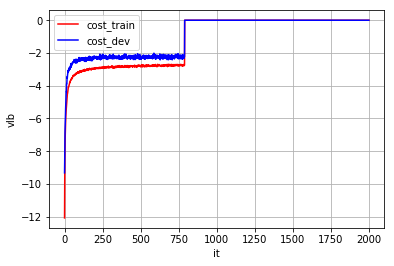

In [20]:
from __future__ import division
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss_cat import VAEAC_gauss_cat_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker

from src.compas_loader import get_my_COMPAS, X_dims_to_input_dim_vec, join_compas_targets

masker = top_masker(p=1)

x_train, x_test, x_means, x_stds, y_train, y_test, feature_names, X_dims = \
    get_my_COMPAS(rseed=42, separate_test=True, test_ratio=0.1, save_dir='../data/')
input_dim_vec = X_dims_to_input_dim_vec(X_dims)
print('Compas', x_train.shape, x_test.shape)
print(input_dim_vec)

dname = 'compas'
print(dname)

trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_test, transform=None)

save_dir = '../saves/fc_preact_VAEAC_noclass_NEW_' + dname

width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]

batch_size = 128
nb_epochs = 2000
early_stop = 200
lr = 1e-4

cuda = torch.cuda.is_available()

net = VAEAC_gauss_cat_net(input_dim_vec, width, depth, latent_dim, pred_sig=False, lr=lr,
                          cuda=cuda, flatten=False)


vlb_train, vlb_dev = train_VAEAC(net, masker, save_dir, batch_size, nb_epochs, trainset, valset, cuda,
                     flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)



## LSAT



('LSAT', (17432, 12), (4358, 12))
[1, 1, 8, 2]
lsat

Net:
VAE_gauss_net
    Total params: 0.77M

Network:

Train:
  init cost variables:
it 0/2000, vlb -8.420627,    time: 1.690279 seconds

    vlb -5.170186 (-inf)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_lsat_models/theta_best.dat

it 1/2000, vlb -5.426616,    time: 1.742254 seconds

    vlb -3.813292 (-5.170186)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_lsat_models/theta_best.dat

it 2/2000, vlb -4.532100,    time: 1.752915 seconds

    vlb -3.124697 (-3.813292)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_lsat_models/theta_best.dat

it 3/2000, vlb -3.817519,    time: 1.724062 seconds

    vlb -2.689926 (-3.124697)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_lsat_models/theta_best.dat

it 4/2000, vlb -3.327687,    time: 1.751989 seconds

    vlb -2.349842 (-2.689926)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_lsat_models/theta_best.dat

it 5/2000, vlb -3.001589,    time: 1.745803 seconds

    vlb -2.044724 (-2.3

    vlb -1.390264 (-1.405093)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_lsat_models/theta_best.dat

it 57/2000, vlb -1.982153,    time: 1.740944 seconds

    vlb -1.415364 (-1.390264)

it 58/2000, vlb -1.972512,    time: 1.729847 seconds

    vlb -1.421888 (-1.390264)

it 59/2000, vlb -2.001740,    time: 1.705671 seconds

    vlb -1.392084 (-1.390264)

it 60/2000, vlb -1.995651,    time: 1.705659 seconds

    vlb -1.405481 (-1.390264)

it 61/2000, vlb -1.985299,    time: 1.719618 seconds

    vlb -1.395008 (-1.390264)

it 62/2000, vlb -1.961289,    time: 1.715273 seconds

    vlb -1.391647 (-1.390264)

it 63/2000, vlb -1.992929,    time: 1.718958 seconds

    vlb -1.457552 (-1.390264)

it 64/2000, vlb -1.992637,    time: 1.729314 seconds

    vlb -1.431700 (-1.390264)

it 65/2000, vlb -1.953092,    time: 1.711668 seconds

    vlb -1.408157 (-1.390264)

it 66/2000, vlb -1.985258,    time: 1.727620 seconds

    vlb -1.356483 (-1.390264)

Writting ../saves/fc_preact_VAEAC_noclass_NEW

    vlb -1.352308 (-1.327654)

it 134/2000, vlb -1.918013,    time: 1.738784 seconds

    vlb -1.337400 (-1.327654)

it 135/2000, vlb -1.910028,    time: 1.731963 seconds

    vlb -1.321197 (-1.327654)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_lsat_models/theta_best.dat

it 136/2000, vlb -1.918177,    time: 1.725771 seconds

    vlb -1.389438 (-1.321197)

it 137/2000, vlb -1.929853,    time: 1.727061 seconds

    vlb -1.346360 (-1.321197)

it 138/2000, vlb -1.900919,    time: 1.700968 seconds

    vlb -1.350718 (-1.321197)

it 139/2000, vlb -1.887066,    time: 1.719938 seconds

    vlb -1.357241 (-1.321197)

it 140/2000, vlb -1.887986,    time: 1.706557 seconds

    vlb -1.374546 (-1.321197)

it 141/2000, vlb -1.906117,    time: 1.739345 seconds

    vlb -1.370809 (-1.321197)

it 142/2000, vlb -1.897582,    time: 1.724747 seconds

    vlb -1.339858 (-1.321197)

it 143/2000, vlb -1.906293,    time: 1.727109 seconds

    vlb -1.366953 (-1.321197)

it 144/2000, vlb -1.911142,    time

it 211/2000, vlb -1.885843,    time: 1.723036 seconds

    vlb -1.374672 (-1.291142)

it 212/2000, vlb -1.871219,    time: 1.703997 seconds

    vlb -1.351523 (-1.291142)

it 213/2000, vlb -1.890787,    time: 1.724237 seconds

    vlb -1.336353 (-1.291142)

it 214/2000, vlb -1.902220,    time: 1.728265 seconds

    vlb -1.312242 (-1.291142)

it 215/2000, vlb -1.873042,    time: 1.735817 seconds

    vlb -1.327041 (-1.291142)

it 216/2000, vlb -1.895461,    time: 1.732038 seconds

    vlb -1.333734 (-1.291142)

it 217/2000, vlb -1.909993,    time: 1.717939 seconds

    vlb -1.345280 (-1.291142)

it 218/2000, vlb -1.888618,    time: 1.709336 seconds

    vlb -1.333445 (-1.291142)

it 219/2000, vlb -1.881446,    time: 1.721922 seconds

    vlb -1.374036 (-1.291142)

it 220/2000, vlb -1.870604,    time: 1.718751 seconds

    vlb -1.320976 (-1.291142)

it 221/2000, vlb -1.876339,    time: 1.717963 seconds

    vlb -1.318931 (-1.291142)

it 222/2000, vlb -1.875119,    time: 1.710599 seconds


it 289/2000, vlb -1.877448,    time: 1.708972 seconds

    vlb -1.357469 (-1.289081)

it 290/2000, vlb -1.869916,    time: 1.727040 seconds

    vlb -1.374879 (-1.289081)

it 291/2000, vlb -1.892803,    time: 1.721283 seconds

    vlb -1.320580 (-1.289081)

it 292/2000, vlb -1.869659,    time: 1.703643 seconds

    vlb -1.359170 (-1.289081)

it 293/2000, vlb -1.871537,    time: 1.734221 seconds

    vlb -1.321484 (-1.289081)

it 294/2000, vlb -1.891933,    time: 1.704522 seconds

    vlb -1.314319 (-1.289081)

it 295/2000, vlb -1.880428,    time: 1.741700 seconds

    vlb -1.316939 (-1.289081)

it 296/2000, vlb -1.881622,    time: 1.705606 seconds

    vlb -1.383270 (-1.289081)

it 297/2000, vlb -1.873827,    time: 1.697444 seconds

    vlb -1.338019 (-1.289081)

it 298/2000, vlb -1.879787,    time: 1.727605 seconds

    vlb -1.339798 (-1.289081)

it 299/2000, vlb -1.867051,    time: 1.734410 seconds

    vlb -1.349577 (-1.289081)

it 300/2000, vlb -1.880916,    time: 1.722448 seconds


it 368/2000, vlb -1.849176,    time: 1.682793 seconds

    vlb -1.276589 (-1.289081)

Writting ../saves/fc_preact_VAEAC_noclass_NEW_lsat_models/theta_best.dat

it 369/2000, vlb -1.872999,    time: 1.785847 seconds

    vlb -1.342933 (-1.276589)

it 370/2000, vlb -1.863335,    time: 1.705201 seconds

    vlb -1.335027 (-1.276589)

it 371/2000, vlb -1.836289,    time: 1.700152 seconds

    vlb -1.328318 (-1.276589)

it 372/2000, vlb -1.852485,    time: 1.711776 seconds

    vlb -1.305402 (-1.276589)

it 373/2000, vlb -1.863864,    time: 1.743658 seconds

    vlb -1.351577 (-1.276589)

it 374/2000, vlb -1.871254,    time: 1.714818 seconds

    vlb -1.335014 (-1.276589)

it 375/2000, vlb -1.861465,    time: 1.705931 seconds

    vlb -1.332344 (-1.276589)

it 376/2000, vlb -1.875413,    time: 1.697571 seconds

    vlb -1.339842 (-1.276589)

it 377/2000, vlb -1.861701,    time: 1.730729 seconds

    vlb -1.338218 (-1.276589)

it 378/2000, vlb -1.865626,    time: 1.743127 seconds

    vlb -1.

it 446/2000, vlb -1.853042,    time: 1.704586 seconds

    vlb -1.322479 (-1.276589)

it 447/2000, vlb -1.854267,    time: 1.730281 seconds

    vlb -1.304905 (-1.276589)

it 448/2000, vlb -1.875167,    time: 1.701888 seconds

    vlb -1.342864 (-1.276589)

it 449/2000, vlb -1.840823,    time: 1.719114 seconds

    vlb -1.370335 (-1.276589)

it 450/2000, vlb -1.830553,    time: 1.723204 seconds

    vlb -1.289539 (-1.276589)

it 451/2000, vlb -1.844826,    time: 1.701245 seconds

    vlb -1.334491 (-1.276589)

it 452/2000, vlb -1.851549,    time: 1.703958 seconds

    vlb -1.340961 (-1.276589)

it 453/2000, vlb -1.858675,    time: 1.714451 seconds

    vlb -1.346811 (-1.276589)

it 454/2000, vlb -1.867622,    time: 1.700989 seconds

    vlb -1.350478 (-1.276589)

it 455/2000, vlb -1.844393,    time: 1.744053 seconds

    vlb -1.350301 (-1.276589)

it 456/2000, vlb -1.855419,    time: 1.738423 seconds

    vlb -1.333425 (-1.276589)

it 457/2000, vlb -1.861496,    time: 1.734141 seconds


it 525/2000, vlb -1.859504,    time: 1.708016 seconds

    vlb -1.324515 (-1.276589)

it 526/2000, vlb -1.857245,    time: 1.709791 seconds

    vlb -1.305891 (-1.276589)

it 527/2000, vlb -1.858695,    time: 1.708690 seconds

    vlb -1.357788 (-1.276589)

it 528/2000, vlb -1.845781,    time: 1.698994 seconds

    vlb -1.385673 (-1.276589)

it 529/2000, vlb -1.825677,    time: 1.759167 seconds

    vlb -1.333521 (-1.276589)

it 530/2000, vlb -1.859708,    time: 1.723685 seconds

    vlb -1.390562 (-1.276589)

it 531/2000, vlb -1.856181,    time: 1.703374 seconds

    vlb -1.313950 (-1.276589)

it 532/2000, vlb -1.858652,    time: 1.712457 seconds

    vlb -1.363592 (-1.276589)

it 533/2000, vlb -1.854493,    time: 1.729510 seconds

    vlb -1.357977 (-1.276589)

it 534/2000, vlb -1.871222,    time: 1.752786 seconds

    vlb -1.330405 (-1.276589)

it 535/2000, vlb -1.844425,    time: 1.719614 seconds

    vlb -1.337908 (-1.276589)

it 536/2000, vlb -1.853913,    time: 1.705551 seconds


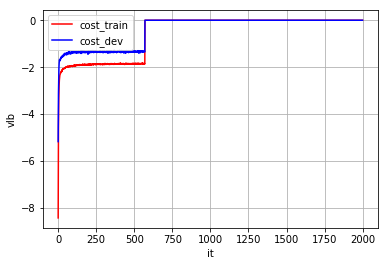

In [21]:
from __future__ import division
import torch
from torchvision import datasets, transforms
from VAEAC.fc_gauss_cat import VAEAC_gauss_cat_net
from VAEAC.train import train_VAEAC
from src.utils import Datafeed
from src.masks import top_masker

from src.LSAT_loader import get_my_LSAT, join_LSAT_targets

masker = top_masker(p=1)

x_train, x_test, x_means, x_stds, y_train, y_test, y_means, y_stds, my_data_keys, input_dim_vec = \
    get_my_LSAT(save_dir='../data/')
print('LSAT', x_train.shape, x_test.shape)
print(input_dim_vec)

dname = 'lsat'
print(dname)

trainset = Datafeed(x_train, x_train, transform=None)
valset = Datafeed(x_test, x_test, transform=None)

save_dir = '../saves/fc_preact_VAEAC_noclass_NEW_' + dname

width = widths[names.index(dname)]
depth = depths[names.index(dname)] # number of hidden layers
latent_dim = latent_dims[names.index(dname)]

batch_size = 128
nb_epochs = 2000
early_stop = 200
lr = 1e-4

cuda = torch.cuda.is_available()

net = VAEAC_gauss_cat_net(input_dim_vec, width, depth, latent_dim, pred_sig=False, lr=lr,
                          cuda=cuda, flatten=False)


vlb_train, vlb_dev = train_VAEAC(net, masker, save_dir, batch_size, nb_epochs, trainset, valset, cuda,
                     flat_ims=False, train_plot=False, Nclass=None, early_stop=early_stop)

